In [188]:
%matplotlib inline

In [189]:
import numpy as np
from matplotlib import pyplot as plt

In [190]:
#each point plots length, if the animal has a blowhole(1 or 0), tooth size, and its identity vector
#[0,0,0] is a fish, [0,0,1] is a dolphin, and [0,1,0] is a shark
data = [[1   , 0       , 0.01],
	   [2    , 0       , 0.05],
	   [4    , 0       , 0.09],
	   [20   , 1       , 0.2],
	   [24   , 1       , 0.4],
	   [28   , 1       , 0.8],
	   [10   , 0       , 1],
	   [15   , 0       , 5],
	   [19   , 0       , 7]]

target=       [[0, 0, 0],
               [0, 0, 0],
               [0, 0, 0],
               [0, 0, 1],
               [0, 0, 1],
               [0, 0, 1],
               [0, 1, 0],
               [0, 1, 0],
               [0, 1, 0],]

fish = [0,0,0]
dolphin = [0,0,1]
shark = [0,1,0]

In [191]:
def sigmoid(x):
    return 1/(1+np.exp(-x))
def sigmoid_d(x):
    return sigmoid(x) * (1 - sigmoid(x))

In [192]:
# Weights and biases
layer1weights = np.random.randn(3,4)
layer2weights = np.random.randn(4,3)
b1 = np.random.randn(1,4)
b2 = np.random.randn(1,3)

In [193]:
learning_rate = .2
costs=[]
for i in range(50000):
    ri = np.random.randint(len(data))
    random_point = data[ri]
    target_point = target[ri]
    
    #Feed Forward
    z1 = np.dot(random_point, layer1weights) + b1
    a1 = sigmoid(z1)
    z2 = np.dot(a1, layer2weights) + b2
    prediction = sigmoid(z2)
    #print(z1, a1, z2, prediction)
    
    #Training
    cost = (np.square(prediction[0][0] - target_point[0]) + np.square(prediction[0][1] - target_point[1]))/2
    costs.append(cost)
    
    #For layer output layer weights
    dcost_dpred = 2 * (prediction[0] - target_point)
    dpred_dz2 = sigmoid_d(z2)
    dz2_dlayer2weights= a1.T
    delta_layer2weights = np.dot(dz2_dlayer2weights, np.multiply(dcost_dpred, dpred_dz2))
    
    #For hidden layer weights
    dz2_da1 = layer2weights.T
    da1_dz1 = sigmoid_d(z1)
    dz1_dw1 = np.matrix(random_point).T
    delta_layer1weights = np.dot(dz1_dw1, np.multiply(np.dot(np.multiply(dcost_dpred, dpred_dz2), dz2_da1), da1_dz1))
    
    #For adjusting bias matrix b2:
    delta_b2 = np.multiply(dcost_dpred, dpred_dz2)
    
    #For adjusting bias matrix b1:
    delta_b1 = np.multiply(np.dot(np.multiply(dcost_dpred, dpred_dz2), dz2_da1), da1_dz1)
    
    #Weight Adjustments:
    layer2weights -= np.multiply(learning_rate, delta_layer2weights)
    layer1weights -= np.multiply(learning_rate, delta_layer1weights)
    
    #Bias Adjustments:
    b2 -= np.multiply(learning_rate, delta_b2)
    b1 -= np.multiply(learning_rate, delta_b1)
    
    rounded_prediction = np.around(prediction)
    
    if((np.array(target_point) == fish).all()):
        print("Target: Fish")
    elif((np.array(target_point) == dolphin).all()):
        print("Target: Dolphin")
    elif((np.array(target_point) == shark).all()):
        print("Target: Shark")
    
    if((rounded_prediction[0] == fish).all()):
        print("Prediction: Fish")
    elif((rounded_prediction[0] == dolphin).all()):
        print("Prediction: Dolphin")
    elif((rounded_prediction[0] == shark).all()):
        print("Prediction: Shark")
    else:
        print("Prediction: Not sure")
        
    print("")

Target: Fish
Prediction: Dolphin

Target: Dolphin
Prediction: Dolphin

Target: Shark
Prediction: Dolphin

Target: Shark
Prediction: Dolphin

Target: Fish
Prediction: Fish

Target: Dolphin
Prediction: Fish

Target: Dolphin
Prediction: Dolphin

Target: Fish
Prediction: Fish

Target: Fish
Prediction: Dolphin

Target: Dolphin
Prediction: Dolphin

Target: Dolphin
Prediction: Dolphin

Target: Fish
Prediction: Fish

Target: Fish
Prediction: Fish

Target: Fish
Prediction: Fish

Target: Dolphin
Prediction: Dolphin

Target: Dolphin
Prediction: Dolphin

Target: Shark
Prediction: Fish

Target: Shark
Prediction: Fish

Target: Shark
Prediction: Fish

Target: Dolphin
Prediction: Fish

Target: Fish
Prediction: Fish

Target: Dolphin
Prediction: Fish

Target: Fish
Prediction: Fish

Target: Shark
Prediction: Dolphin

Target: Fish
Prediction: Fish

Target: Shark
Prediction: Dolphin

Target: Shark
Prediction: Fish

Target: Fish
Prediction: Fish

Target: Dolphin
Prediction: Fish

Target: Fish
Prediction: Fi

Target: Shark
Prediction: Fish

Target: Dolphin
Prediction: Fish

Target: Dolphin
Prediction: Fish

Target: Fish
Prediction: Fish

Target: Shark
Prediction: Fish

Target: Fish
Prediction: Fish

Target: Dolphin
Prediction: Fish

Target: Fish
Prediction: Fish

Target: Shark
Prediction: Fish

Target: Fish
Prediction: Fish

Target: Fish
Prediction: Fish

Target: Shark
Prediction: Fish

Target: Shark
Prediction: Fish

Target: Shark
Prediction: Shark

Target: Fish
Prediction: Fish

Target: Shark
Prediction: Shark

Target: Shark
Prediction: Fish

Target: Shark
Prediction: Shark

Target: Fish
Prediction: Fish

Target: Fish
Prediction: Fish

Target: Fish
Prediction: Fish

Target: Fish
Prediction: Fish

Target: Shark
Prediction: Shark

Target: Shark
Prediction: Shark

Target: Dolphin
Prediction: Fish

Target: Dolphin
Prediction: Fish

Target: Dolphin
Prediction: Fish

Target: Dolphin
Prediction: Fish

Target: Shark
Prediction: Fish

Target: Fish
Prediction: Fish

Target: Fish
Prediction: Fish

T

Target: Dolphin
Prediction: Dolphin

Target: Shark
Prediction: Dolphin

Target: Shark
Prediction: Fish

Target: Fish
Prediction: Fish

Target: Fish
Prediction: Fish

Target: Shark
Prediction: Shark

Target: Fish
Prediction: Fish

Target: Fish
Prediction: Fish

Target: Dolphin
Prediction: Shark

Target: Dolphin
Prediction: Dolphin

Target: Shark
Prediction: Fish

Target: Fish
Prediction: Fish

Target: Shark
Prediction: Shark

Target: Fish
Prediction: Fish

Target: Shark
Prediction: Shark

Target: Dolphin
Prediction: Dolphin

Target: Dolphin
Prediction: Dolphin

Target: Shark
Prediction: Fish

Target: Shark
Prediction: Shark

Target: Dolphin
Prediction: Shark

Target: Fish
Prediction: Fish

Target: Shark
Prediction: Dolphin

Target: Dolphin
Prediction: Dolphin

Target: Shark
Prediction: Shark

Target: Fish
Prediction: Fish

Target: Dolphin
Prediction: Dolphin

Target: Shark
Prediction: Shark

Target: Dolphin
Prediction: Dolphin

Target: Dolphin
Prediction: Dolphin

Target: Fish
Predictio

Target: Shark
Prediction: Shark

Target: Shark
Prediction: Shark

Target: Fish
Prediction: Fish

Target: Fish
Prediction: Fish

Target: Shark
Prediction: Shark

Target: Fish
Prediction: Fish

Target: Dolphin
Prediction: Dolphin

Target: Shark
Prediction: Shark

Target: Dolphin
Prediction: Dolphin

Target: Shark
Prediction: Shark

Target: Fish
Prediction: Fish

Target: Shark
Prediction: Shark

Target: Dolphin
Prediction: Dolphin

Target: Fish
Prediction: Fish

Target: Dolphin
Prediction: Dolphin

Target: Dolphin
Prediction: Dolphin

Target: Dolphin
Prediction: Dolphin

Target: Dolphin
Prediction: Dolphin

Target: Shark
Prediction: Shark

Target: Dolphin
Prediction: Dolphin

Target: Fish
Prediction: Fish

Target: Fish
Prediction: Fish

Target: Dolphin
Prediction: Dolphin

Target: Dolphin
Prediction: Dolphin

Target: Shark
Prediction: Shark

Target: Shark
Prediction: Shark

Target: Shark
Prediction: Shark

Target: Shark
Prediction: Shark

Target: Shark
Prediction: Shark

Target: Dolphin
P

Prediction: Shark

Target: Dolphin
Prediction: Dolphin

Target: Fish
Prediction: Fish

Target: Dolphin
Prediction: Dolphin

Target: Fish
Prediction: Fish

Target: Fish
Prediction: Fish

Target: Dolphin
Prediction: Dolphin

Target: Shark
Prediction: Shark

Target: Dolphin
Prediction: Dolphin

Target: Dolphin
Prediction: Dolphin

Target: Shark
Prediction: Shark

Target: Fish
Prediction: Fish

Target: Fish
Prediction: Fish

Target: Shark
Prediction: Shark

Target: Shark
Prediction: Shark

Target: Fish
Prediction: Fish

Target: Fish
Prediction: Fish

Target: Fish
Prediction: Fish

Target: Fish
Prediction: Fish

Target: Dolphin
Prediction: Dolphin

Target: Dolphin
Prediction: Dolphin

Target: Fish
Prediction: Fish

Target: Fish
Prediction: Fish

Target: Fish
Prediction: Fish

Target: Dolphin
Prediction: Dolphin

Target: Fish
Prediction: Fish

Target: Fish
Prediction: Fish

Target: Dolphin
Prediction: Dolphin

Target: Shark
Prediction: Shark

Target: Shark
Prediction: Shark

Target: Shark
Pr

Target: Fish
Prediction: Fish

Target: Shark
Prediction: Shark

Target: Fish
Prediction: Fish

Target: Shark
Prediction: Shark

Target: Shark
Prediction: Shark

Target: Shark
Prediction: Shark

Target: Dolphin
Prediction: Dolphin

Target: Shark
Prediction: Shark

Target: Shark
Prediction: Shark

Target: Fish
Prediction: Fish

Target: Fish
Prediction: Fish

Target: Dolphin
Prediction: Dolphin

Target: Dolphin
Prediction: Dolphin

Target: Shark
Prediction: Shark

Target: Dolphin
Prediction: Dolphin

Target: Dolphin
Prediction: Dolphin

Target: Shark
Prediction: Shark

Target: Fish
Prediction: Fish

Target: Shark
Prediction: Shark

Target: Fish
Prediction: Fish

Target: Shark
Prediction: Shark

Target: Fish
Prediction: Fish

Target: Shark
Prediction: Shark

Target: Shark
Prediction: Shark

Target: Fish
Prediction: Fish

Target: Fish
Prediction: Fish

Target: Shark
Prediction: Shark

Target: Dolphin
Prediction: Dolphin

Target: Fish
Prediction: Fish

Target: Dolphin
Prediction: Dolphin

Ta

Target: Shark
Prediction: Shark

Target: Fish
Prediction: Fish

Target: Shark
Prediction: Shark

Target: Shark
Prediction: Shark

Target: Fish
Prediction: Fish

Target: Shark
Prediction: Shark

Target: Shark
Prediction: Shark

Target: Shark
Prediction: Shark

Target: Fish
Prediction: Fish

Target: Dolphin
Prediction: Dolphin

Target: Fish
Prediction: Fish

Target: Shark
Prediction: Shark

Target: Fish
Prediction: Fish

Target: Fish
Prediction: Fish

Target: Dolphin
Prediction: Dolphin

Target: Fish
Prediction: Fish

Target: Fish
Prediction: Fish

Target: Dolphin
Prediction: Dolphin

Target: Shark
Prediction: Shark

Target: Dolphin
Prediction: Dolphin

Target: Dolphin
Prediction: Dolphin

Target: Shark
Prediction: Shark

Target: Dolphin
Prediction: Dolphin

Target: Dolphin
Prediction: Dolphin

Target: Fish
Prediction: Fish

Target: Shark
Prediction: Shark

Target: Dolphin
Prediction: Dolphin

Target: Fish
Prediction: Fish

Target: Dolphin
Prediction: Dolphin

Target: Fish
Prediction: Fi

Target: Shark
Prediction: Shark

Target: Fish
Prediction: Fish

Target: Shark
Prediction: Shark

Target: Fish
Prediction: Fish

Target: Fish
Prediction: Fish

Target: Shark
Prediction: Shark

Target: Shark
Prediction: Shark

Target: Shark
Prediction: Shark

Target: Fish
Prediction: Fish

Target: Shark
Prediction: Shark

Target: Fish
Prediction: Fish

Target: Dolphin
Prediction: Dolphin

Target: Fish
Prediction: Fish

Target: Dolphin
Prediction: Dolphin

Target: Fish
Prediction: Fish

Target: Shark
Prediction: Shark

Target: Shark
Prediction: Shark

Target: Fish
Prediction: Fish

Target: Shark
Prediction: Shark

Target: Dolphin
Prediction: Dolphin

Target: Dolphin
Prediction: Dolphin

Target: Fish
Prediction: Fish

Target: Dolphin
Prediction: Dolphin

Target: Fish
Prediction: Fish

Target: Fish
Prediction: Fish

Target: Shark
Prediction: Shark

Target: Dolphin
Prediction: Dolphin

Target: Fish
Prediction: Fish

Target: Fish
Prediction: Fish

Target: Fish
Prediction: Fish

Target: Shark


Target: Shark
Prediction: Shark

Target: Shark
Prediction: Shark

Target: Shark
Prediction: Shark

Target: Dolphin
Prediction: Dolphin

Target: Shark
Prediction: Shark

Target: Dolphin
Prediction: Dolphin

Target: Dolphin
Prediction: Dolphin

Target: Shark
Prediction: Shark

Target: Shark
Prediction: Shark

Target: Shark
Prediction: Shark

Target: Dolphin
Prediction: Dolphin

Target: Shark
Prediction: Shark

Target: Shark
Prediction: Shark

Target: Dolphin
Prediction: Dolphin

Target: Dolphin
Prediction: Dolphin

Target: Fish
Prediction: Fish

Target: Dolphin
Prediction: Dolphin

Target: Shark
Prediction: Shark

Target: Shark
Prediction: Shark

Target: Dolphin
Prediction: Dolphin

Target: Shark
Prediction: Shark

Target: Shark
Prediction: Shark

Target: Fish
Prediction: Fish

Target: Fish
Prediction: Fish

Target: Fish
Prediction: Fish

Target: Dolphin
Prediction: Dolphin

Target: Dolphin
Prediction: Dolphin

Target: Fish
Prediction: Fish

Target: Shark
Prediction: Shark

Target: Fish


Target: Shark
Prediction: Shark

Target: Shark
Prediction: Shark

Target: Shark
Prediction: Shark

Target: Dolphin
Prediction: Dolphin

Target: Fish
Prediction: Fish

Target: Shark
Prediction: Shark

Target: Shark
Prediction: Shark

Target: Dolphin
Prediction: Dolphin

Target: Dolphin
Prediction: Dolphin

Target: Fish
Prediction: Fish

Target: Shark
Prediction: Shark

Target: Dolphin
Prediction: Dolphin

Target: Shark
Prediction: Shark

Target: Fish
Prediction: Fish

Target: Shark
Prediction: Shark

Target: Shark
Prediction: Shark

Target: Shark
Prediction: Shark

Target: Shark
Prediction: Shark

Target: Shark
Prediction: Shark

Target: Dolphin
Prediction: Dolphin

Target: Shark
Prediction: Shark

Target: Fish
Prediction: Fish

Target: Shark
Prediction: Shark

Target: Dolphin
Prediction: Dolphin

Target: Fish
Prediction: Fish

Target: Fish
Prediction: Fish

Target: Dolphin
Prediction: Dolphin

Target: Fish
Prediction: Fish

Target: Shark
Prediction: Shark

Target: Fish
Prediction: Fish

Target: Shark
Prediction: Shark

Target: Dolphin
Prediction: Dolphin

Target: Fish
Prediction: Fish

Target: Dolphin
Prediction: Dolphin

Target: Shark
Prediction: Shark

Target: Dolphin
Prediction: Dolphin

Target: Dolphin
Prediction: Dolphin

Target: Shark
Prediction: Shark

Target: Shark
Prediction: Shark

Target: Dolphin
Prediction: Dolphin

Target: Shark
Prediction: Shark

Target: Shark
Prediction: Shark

Target: Dolphin
Prediction: Dolphin

Target: Dolphin
Prediction: Dolphin

Target: Fish
Prediction: Fish

Target: Shark
Prediction: Shark

Target: Dolphin
Prediction: Dolphin

Target: Fish
Prediction: Fish

Target: Dolphin
Prediction: Dolphin

Target: Dolphin
Prediction: Dolphin

Target: Shark
Prediction: Shark

Target: Shark
Prediction: Shark

Target: Shark
Prediction: Shark

Target: Dolphin
Prediction: Dolphin

Target: Fish
Prediction: Fish

Target: Dolphin
Prediction: Dolphin

Target: Fish
Prediction: Fish

Target: Fish
Prediction: Fish

Target: Shark
Prediction: Shark

Target:


Target: Fish
Prediction: Fish

Target: Dolphin
Prediction: Dolphin

Target: Shark
Prediction: Shark

Target: Shark
Prediction: Shark

Target: Shark
Prediction: Shark

Target: Dolphin
Prediction: Dolphin

Target: Shark
Prediction: Shark

Target: Shark
Prediction: Shark

Target: Dolphin
Prediction: Dolphin

Target: Dolphin
Prediction: Dolphin

Target: Shark
Prediction: Shark

Target: Shark
Prediction: Shark

Target: Fish
Prediction: Fish

Target: Dolphin
Prediction: Dolphin

Target: Dolphin
Prediction: Dolphin

Target: Shark
Prediction: Shark

Target: Dolphin
Prediction: Dolphin

Target: Dolphin
Prediction: Dolphin

Target: Fish
Prediction: Fish

Target: Shark
Prediction: Shark

Target: Shark
Prediction: Shark

Target: Fish
Prediction: Fish

Target: Shark
Prediction: Shark

Target: Dolphin
Prediction: Dolphin

Target: Dolphin
Prediction: Dolphin

Target: Shark
Prediction: Shark

Target: Shark
Prediction: Shark

Target: Fish
Prediction: Fish

Target: Dolphin
Prediction: Dolphin

Target: 

Target: Shark
Prediction: Shark

Target: Fish
Prediction: Fish

Target: Dolphin
Prediction: Dolphin

Target: Dolphin
Prediction: Dolphin

Target: Shark
Prediction: Shark

Target: Shark
Prediction: Shark

Target: Shark
Prediction: Shark

Target: Dolphin
Prediction: Dolphin

Target: Fish
Prediction: Fish

Target: Shark
Prediction: Shark

Target: Fish
Prediction: Fish

Target: Dolphin
Prediction: Dolphin

Target: Fish
Prediction: Fish

Target: Fish
Prediction: Fish

Target: Fish
Prediction: Fish

Target: Fish
Prediction: Fish

Target: Fish
Prediction: Fish

Target: Fish
Prediction: Fish

Target: Fish
Prediction: Fish

Target: Fish
Prediction: Fish

Target: Shark
Prediction: Shark

Target: Fish
Prediction: Fish

Target: Shark
Prediction: Shark

Target: Fish
Prediction: Fish

Target: Dolphin
Prediction: Dolphin

Target: Fish
Prediction: Fish

Target: Dolphin
Prediction: Dolphin

Target: Shark
Prediction: Shark

Target: Dolphin
Prediction: Dolphin

Target: Shark
Prediction: Shark

Target: Do

Target: Shark
Prediction: Shark

Target: Dolphin
Prediction: Dolphin

Target: Dolphin
Prediction: Dolphin

Target: Fish
Prediction: Fish

Target: Fish
Prediction: Fish

Target: Fish
Prediction: Fish

Target: Dolphin
Prediction: Dolphin

Target: Fish
Prediction: Fish

Target: Shark
Prediction: Shark

Target: Fish
Prediction: Fish

Target: Dolphin
Prediction: Dolphin

Target: Dolphin
Prediction: Dolphin

Target: Dolphin
Prediction: Dolphin

Target: Shark
Prediction: Shark

Target: Dolphin
Prediction: Dolphin

Target: Fish
Prediction: Fish

Target: Shark
Prediction: Shark

Target: Dolphin
Prediction: Dolphin

Target: Fish
Prediction: Fish

Target: Dolphin
Prediction: Dolphin

Target: Dolphin
Prediction: Dolphin

Target: Fish
Prediction: Fish

Target: Dolphin
Prediction: Dolphin

Target: Dolphin
Prediction: Dolphin

Target: Fish
Prediction: Fish

Target: Shark
Prediction: Shark

Target: Fish
Prediction: Fish

Target: Shark
Prediction: Shark

Target: Shark
Prediction: Shark

Target: Fish
Pr

Target: Shark
Prediction: Shark

Target: Shark
Prediction: Shark

Target: Fish
Prediction: Fish

Target: Shark
Prediction: Shark

Target: Dolphin
Prediction: Dolphin

Target: Dolphin
Prediction: Dolphin

Target: Fish
Prediction: Fish

Target: Dolphin
Prediction: Dolphin

Target: Fish
Prediction: Fish

Target: Dolphin
Prediction: Dolphin

Target: Dolphin
Prediction: Dolphin

Target: Dolphin
Prediction: Dolphin

Target: Dolphin
Prediction: Dolphin

Target: Fish
Prediction: Fish

Target: Dolphin
Prediction: Dolphin

Target: Dolphin
Prediction: Dolphin

Target: Fish
Prediction: Fish

Target: Fish
Prediction: Fish

Target: Dolphin
Prediction: Dolphin

Target: Shark
Prediction: Shark

Target: Fish
Prediction: Fish

Target: Dolphin
Prediction: Dolphin

Target: Dolphin
Prediction: Dolphin

Target: Fish
Prediction: Fish

Target: Fish
Prediction: Fish

Target: Fish
Prediction: Fish

Target: Shark
Prediction: Shark

Target: Shark
Prediction: Shark

Target: Fish
Prediction: Fish

Target: Dolphin
P

Target: Shark
Prediction: Shark

Target: Shark
Prediction: Shark

Target: Dolphin
Prediction: Dolphin

Target: Dolphin
Prediction: Dolphin

Target: Shark
Prediction: Shark

Target: Shark
Prediction: Shark

Target: Fish
Prediction: Fish

Target: Fish
Prediction: Fish

Target: Shark
Prediction: Shark

Target: Fish
Prediction: Fish

Target: Shark
Prediction: Shark

Target: Dolphin
Prediction: Dolphin

Target: Shark
Prediction: Shark

Target: Fish
Prediction: Fish

Target: Shark
Prediction: Shark

Target: Shark
Prediction: Shark

Target: Dolphin
Prediction: Dolphin

Target: Shark
Prediction: Shark

Target: Dolphin
Prediction: Dolphin

Target: Dolphin
Prediction: Dolphin

Target: Dolphin
Prediction: Dolphin

Target: Shark
Prediction: Shark

Target: Dolphin
Prediction: Dolphin

Target: Shark
Prediction: Shark

Target: Fish
Prediction: Fish

Target: Fish
Prediction: Fish

Target: Dolphin
Prediction: Dolphin

Target: Fish
Prediction: Fish

Target: Dolphin
Prediction: Dolphin

Target: Fish
Pred

Target: Shark
Prediction: Shark

Target: Fish
Prediction: Fish

Target: Dolphin
Prediction: Dolphin

Target: Shark
Prediction: Shark

Target: Shark
Prediction: Shark

Target: Fish
Prediction: Fish

Target: Shark
Prediction: Shark

Target: Shark
Prediction: Shark

Target: Shark
Prediction: Shark

Target: Fish
Prediction: Fish

Target: Dolphin
Prediction: Dolphin

Target: Fish
Prediction: Fish

Target: Dolphin
Prediction: Dolphin

Target: Fish
Prediction: Fish

Target: Fish
Prediction: Fish

Target: Fish
Prediction: Fish

Target: Fish
Prediction: Fish

Target: Dolphin
Prediction: Dolphin

Target: Fish
Prediction: Fish

Target: Dolphin
Prediction: Dolphin

Target: Shark
Prediction: Shark

Target: Fish
Prediction: Fish

Target: Shark
Prediction: Shark

Target: Fish
Prediction: Fish

Target: Dolphin
Prediction: Dolphin

Target: Dolphin
Prediction: Dolphin

Target: Dolphin
Prediction: Dolphin

Target: Shark
Prediction: Shark

Target: Shark
Prediction: Shark

Target: Fish
Prediction: Fish

Ta

Target: Fish
Prediction: Fish

Target: Fish
Prediction: Fish

Target: Fish
Prediction: Fish

Target: Shark
Prediction: Shark

Target: Fish
Prediction: Fish

Target: Fish
Prediction: Fish

Target: Dolphin
Prediction: Dolphin

Target: Fish
Prediction: Fish

Target: Fish
Prediction: Fish

Target: Dolphin
Prediction: Dolphin

Target: Shark
Prediction: Shark

Target: Dolphin
Prediction: Dolphin

Target: Dolphin
Prediction: Dolphin

Target: Shark
Prediction: Shark

Target: Shark
Prediction: Shark

Target: Dolphin
Prediction: Dolphin

Target: Dolphin
Prediction: Dolphin

Target: Shark
Prediction: Shark

Target: Fish
Prediction: Fish

Target: Shark
Prediction: Shark

Target: Fish
Prediction: Fish

Target: Shark
Prediction: Shark

Target: Shark
Prediction: Shark

Target: Shark
Prediction: Shark

Target: Fish
Prediction: Fish

Target: Shark
Prediction: Shark

Target: Fish
Prediction: Fish

Target: Fish
Prediction: Fish

Target: Fish
Prediction: Fish

Target: Fish
Prediction: Fish

Target: Fish
P

Target: Shark
Prediction: Shark

Target: Shark
Prediction: Shark

Target: Shark
Prediction: Shark

Target: Dolphin
Prediction: Dolphin

Target: Dolphin
Prediction: Dolphin

Target: Fish
Prediction: Fish

Target: Dolphin
Prediction: Dolphin

Target: Shark
Prediction: Shark

Target: Shark
Prediction: Shark

Target: Fish
Prediction: Fish

Target: Fish
Prediction: Fish

Target: Shark
Prediction: Shark

Target: Dolphin
Prediction: Dolphin

Target: Fish
Prediction: Fish

Target: Fish
Prediction: Fish

Target: Fish
Prediction: Fish

Target: Fish
Prediction: Fish

Target: Fish
Prediction: Fish

Target: Shark
Prediction: Shark

Target: Dolphin
Prediction: Dolphin

Target: Dolphin
Prediction: Dolphin

Target: Shark
Prediction: Shark

Target: Shark
Prediction: Shark

Target: Dolphin
Prediction: Dolphin

Target: Shark
Prediction: Shark

Target: Fish
Prediction: Fish

Target: Shark
Prediction: Shark

Target: Fish
Prediction: Fish

Target: Fish
Prediction: Fish

Target: Dolphin
Prediction: Dolphin



Target: Shark
Prediction: Shark

Target: Shark
Prediction: Shark

Target: Dolphin
Prediction: Dolphin

Target: Fish
Prediction: Fish

Target: Fish
Prediction: Fish

Target: Fish
Prediction: Fish

Target: Fish
Prediction: Fish

Target: Fish
Prediction: Fish

Target: Shark
Prediction: Shark

Target: Shark
Prediction: Shark

Target: Dolphin
Prediction: Dolphin

Target: Dolphin
Prediction: Dolphin

Target: Fish
Prediction: Fish

Target: Shark
Prediction: Shark

Target: Shark
Prediction: Shark

Target: Fish
Prediction: Fish

Target: Shark
Prediction: Shark

Target: Dolphin
Prediction: Dolphin

Target: Shark
Prediction: Shark

Target: Shark
Prediction: Shark

Target: Dolphin
Prediction: Dolphin

Target: Dolphin
Prediction: Dolphin

Target: Fish
Prediction: Fish

Target: Shark
Prediction: Shark

Target: Dolphin
Prediction: Dolphin

Target: Shark
Prediction: Shark

Target: Dolphin
Prediction: Dolphin

Target: Dolphin
Prediction: Dolphin

Target: Shark
Prediction: Shark

Target: Dolphin
Predict

Target: Shark
Prediction: Shark

Target: Dolphin
Prediction: Dolphin

Target: Dolphin
Prediction: Dolphin

Target: Dolphin
Prediction: Dolphin

Target: Dolphin
Prediction: Dolphin

Target: Dolphin
Prediction: Dolphin

Target: Fish
Prediction: Fish

Target: Dolphin
Prediction: Dolphin

Target: Dolphin
Prediction: Dolphin

Target: Fish
Prediction: Fish

Target: Shark
Prediction: Shark

Target: Fish
Prediction: Fish

Target: Fish
Prediction: Fish

Target: Fish
Prediction: Fish

Target: Dolphin
Prediction: Dolphin

Target: Shark
Prediction: Shark

Target: Dolphin
Prediction: Dolphin

Target: Dolphin
Prediction: Dolphin

Target: Dolphin
Prediction: Dolphin

Target: Dolphin
Prediction: Dolphin

Target: Fish
Prediction: Fish

Target: Dolphin
Prediction: Dolphin

Target: Dolphin
Prediction: Dolphin

Target: Shark
Prediction: Shark

Target: Dolphin
Prediction: Dolphin

Target: Dolphin
Prediction: Dolphin

Target: Fish
Prediction: Fish

Target: Fish
Prediction: Fish

Target: Fish
Prediction: Fis

Target: Shark
Prediction: Shark

Target: Shark
Prediction: Shark

Target: Shark
Prediction: Shark

Target: Shark
Prediction: Shark

Target: Shark
Prediction: Shark

Target: Fish
Prediction: Fish

Target: Shark
Prediction: Shark

Target: Shark
Prediction: Shark

Target: Shark
Prediction: Shark

Target: Fish
Prediction: Fish

Target: Dolphin
Prediction: Dolphin

Target: Shark
Prediction: Shark

Target: Fish
Prediction: Fish

Target: Fish
Prediction: Fish

Target: Dolphin
Prediction: Dolphin

Target: Fish
Prediction: Fish

Target: Fish
Prediction: Fish

Target: Fish
Prediction: Fish

Target: Dolphin
Prediction: Dolphin

Target: Dolphin
Prediction: Dolphin

Target: Dolphin
Prediction: Dolphin

Target: Dolphin
Prediction: Dolphin

Target: Fish
Prediction: Fish

Target: Shark
Prediction: Shark

Target: Shark
Prediction: Shark

Target: Fish
Prediction: Fish

Target: Shark
Prediction: Shark

Target: Fish
Prediction: Fish

Target: Shark
Prediction: Shark

Target: Shark
Prediction: Shark

Target

Target: Shark
Prediction: Shark

Target: Dolphin
Prediction: Dolphin

Target: Dolphin
Prediction: Dolphin

Target: Fish
Prediction: Fish

Target: Dolphin
Prediction: Dolphin

Target: Fish
Prediction: Fish

Target: Fish
Prediction: Fish

Target: Fish
Prediction: Fish

Target: Shark
Prediction: Shark

Target: Dolphin
Prediction: Dolphin

Target: Shark
Prediction: Shark

Target: Dolphin
Prediction: Dolphin

Target: Fish
Prediction: Fish

Target: Fish
Prediction: Fish

Target: Fish
Prediction: Fish

Target: Fish
Prediction: Fish

Target: Dolphin
Prediction: Dolphin

Target: Fish
Prediction: Fish

Target: Shark
Prediction: Shark

Target: Shark
Prediction: Shark

Target: Dolphin
Prediction: Dolphin

Target: Fish
Prediction: Fish

Target: Fish
Prediction: Fish

Target: Shark
Prediction: Shark

Target: Shark
Prediction: Shark

Target: Fish
Prediction: Fish

Target: Fish
Prediction: Fish

Target: Fish
Prediction: Fish

Target: Fish
Prediction: Fish

Target: Shark
Prediction: Shark

Target: Dolp

Target: Dolphin
Prediction: Dolphin

Target: Fish
Prediction: Fish

Target: Fish
Prediction: Fish

Target: Fish
Prediction: Fish

Target: Fish
Prediction: Fish

Target: Shark
Prediction: Shark

Target: Dolphin
Prediction: Dolphin

Target: Dolphin
Prediction: Dolphin

Target: Dolphin
Prediction: Dolphin

Target: Fish
Prediction: Fish

Target: Shark
Prediction: Shark

Target: Shark
Prediction: Shark

Target: Shark
Prediction: Shark

Target: Shark
Prediction: Shark

Target: Shark
Prediction: Shark

Target: Dolphin
Prediction: Dolphin

Target: Shark
Prediction: Shark

Target: Shark
Prediction: Shark

Target: Dolphin
Prediction: Dolphin

Target: Fish
Prediction: Fish

Target: Dolphin
Prediction: Dolphin

Target: Dolphin
Prediction: Dolphin

Target: Dolphin
Prediction: Dolphin

Target: Shark
Prediction: Shark

Target: Shark
Prediction: Shark

Target: Shark
Prediction: Shark

Target: Shark
Prediction: Shark

Target: Dolphin
Prediction: Dolphin

Target: Shark
Prediction: Shark

Target: Dolphin

Target: Shark
Prediction: Shark

Target: Dolphin
Prediction: Dolphin

Target: Fish
Prediction: Fish

Target: Shark
Prediction: Shark

Target: Fish
Prediction: Fish

Target: Shark
Prediction: Shark

Target: Shark
Prediction: Shark

Target: Fish
Prediction: Fish

Target: Fish
Prediction: Fish

Target: Dolphin
Prediction: Dolphin

Target: Shark
Prediction: Shark

Target: Shark
Prediction: Shark

Target: Fish
Prediction: Fish

Target: Dolphin
Prediction: Dolphin

Target: Fish
Prediction: Fish

Target: Shark
Prediction: Shark

Target: Dolphin
Prediction: Dolphin

Target: Fish
Prediction: Fish

Target: Dolphin
Prediction: Dolphin

Target: Dolphin
Prediction: Dolphin

Target: Dolphin
Prediction: Dolphin

Target: Fish
Prediction: Fish

Target: Shark
Prediction: Shark

Target: Fish
Prediction: Fish

Target: Shark
Prediction: Shark

Target: Shark
Prediction: Shark

Target: Shark
Prediction: Shark

Target: Shark
Prediction: Shark

Target: Shark
Prediction: Shark

Target: Dolphin
Prediction: Dolph

Target: Dolphin
Prediction: Dolphin

Target: Dolphin
Prediction: Dolphin

Target: Shark
Prediction: Shark

Target: Dolphin
Prediction: Dolphin

Target: Fish
Prediction: Fish

Target: Shark
Prediction: Shark

Target: Fish
Prediction: Fish

Target: Shark
Prediction: Shark

Target: Shark
Prediction: Shark

Target: Fish
Prediction: Fish

Target: Fish
Prediction: Fish

Target: Dolphin
Prediction: Dolphin

Target: Shark
Prediction: Shark

Target: Dolphin
Prediction: Dolphin

Target: Shark
Prediction: Shark

Target: Fish
Prediction: Fish

Target: Fish
Prediction: Fish

Target: Shark
Prediction: Shark

Target: Dolphin
Prediction: Dolphin

Target: Fish
Prediction: Fish

Target: Shark
Prediction: Shark

Target: Shark
Prediction: Shark

Target: Fish
Prediction: Fish

Target: Fish
Prediction: Fish

Target: Shark
Prediction: Shark

Target: Dolphin
Prediction: Dolphin

Target: Fish
Prediction: Fish

Target: Fish
Prediction: Fish

Target: Shark
Prediction: Shark

Target: Dolphin
Prediction: Dolphin



Target: Dolphin
Prediction: Dolphin

Target: Fish
Prediction: Fish

Target: Shark
Prediction: Shark

Target: Shark
Prediction: Shark

Target: Fish
Prediction: Fish

Target: Shark
Prediction: Shark

Target: Shark
Prediction: Shark

Target: Shark
Prediction: Shark

Target: Fish
Prediction: Fish

Target: Dolphin
Prediction: Dolphin

Target: Fish
Prediction: Fish

Target: Dolphin
Prediction: Dolphin

Target: Shark
Prediction: Shark

Target: Dolphin
Prediction: Dolphin

Target: Fish
Prediction: Fish

Target: Shark
Prediction: Shark

Target: Fish
Prediction: Fish

Target: Dolphin
Prediction: Dolphin

Target: Shark
Prediction: Shark

Target: Shark
Prediction: Shark

Target: Fish
Prediction: Fish

Target: Shark
Prediction: Shark

Target: Dolphin
Prediction: Dolphin

Target: Dolphin
Prediction: Dolphin

Target: Shark
Prediction: Shark

Target: Shark
Prediction: Shark

Target: Shark
Prediction: Shark

Target: Dolphin
Prediction: Dolphin

Target: Fish
Prediction: Fish

Target: Dolphin
Prediction:

Target: Shark
Prediction: Shark

Target: Dolphin
Prediction: Dolphin

Target: Dolphin
Prediction: Dolphin

Target: Fish
Prediction: Fish

Target: Shark
Prediction: Shark

Target: Fish
Prediction: Fish

Target: Shark
Prediction: Shark

Target: Dolphin
Prediction: Dolphin

Target: Fish
Prediction: Fish

Target: Shark
Prediction: Shark

Target: Shark
Prediction: Shark

Target: Dolphin
Prediction: Dolphin

Target: Shark
Prediction: Shark

Target: Shark
Prediction: Shark

Target: Shark
Prediction: Shark

Target: Fish
Prediction: Fish

Target: Dolphin
Prediction: Dolphin

Target: Shark
Prediction: Shark

Target: Dolphin
Prediction: Dolphin

Target: Dolphin
Prediction: Dolphin

Target: Shark
Prediction: Shark

Target: Dolphin
Prediction: Dolphin

Target: Shark
Prediction: Shark

Target: Shark
Prediction: Shark

Target: Dolphin
Prediction: Dolphin

Target: Shark
Prediction: Shark

Target: Shark
Prediction: Shark

Target: Fish
Prediction: Fish

Target: Dolphin
Prediction: Dolphin

Target: Shark

Target: Dolphin
Prediction: Dolphin

Target: Shark
Prediction: Shark

Target: Shark
Prediction: Shark

Target: Shark
Prediction: Shark

Target: Dolphin
Prediction: Dolphin

Target: Fish
Prediction: Fish

Target: Shark
Prediction: Shark

Target: Shark
Prediction: Shark

Target: Shark
Prediction: Shark

Target: Shark
Prediction: Shark

Target: Dolphin
Prediction: Dolphin

Target: Dolphin
Prediction: Dolphin

Target: Fish
Prediction: Fish

Target: Fish
Prediction: Fish

Target: Fish
Prediction: Fish

Target: Fish
Prediction: Fish

Target: Dolphin
Prediction: Dolphin

Target: Dolphin
Prediction: Dolphin

Target: Dolphin
Prediction: Dolphin

Target: Shark
Prediction: Shark

Target: Fish
Prediction: Fish

Target: Shark
Prediction: Shark

Target: Shark
Prediction: Shark

Target: Fish
Prediction: Fish

Target: Shark
Prediction: Shark

Target: Fish
Prediction: Fish

Target: Dolphin
Prediction: Dolphin

Target: Dolphin
Prediction: Dolphin

Target: Shark
Prediction: Shark

Target: Fish
Prediction

Target: Shark
Prediction: Shark

Target: Dolphin
Prediction: Dolphin

Target: Fish
Prediction: Fish

Target: Shark
Prediction: Shark

Target: Dolphin
Prediction: Dolphin

Target: Dolphin
Prediction: Dolphin

Target: Dolphin
Prediction: Dolphin

Target: Shark
Prediction: Shark

Target: Shark
Prediction: Shark

Target: Fish
Prediction: Fish

Target: Dolphin
Prediction: Dolphin

Target: Fish
Prediction: Fish

Target: Dolphin
Prediction: Dolphin

Target: Shark
Prediction: Shark

Target: Shark
Prediction: Shark

Target: Shark
Prediction: Shark

Target: Dolphin
Prediction: Dolphin

Target: Shark
Prediction: Shark

Target: Fish
Prediction: Fish

Target: Shark
Prediction: Shark

Target: Fish
Prediction: Fish

Target: Shark
Prediction: Shark

Target: Fish
Prediction: Fish

Target: Shark
Prediction: Shark

Target: Fish
Prediction: Fish

Target: Fish
Prediction: Fish

Target: Fish
Prediction: Fish

Target: Shark
Prediction: Shark

Target: Dolphin
Prediction: Dolphin

Target: Dolphin
Prediction: D

Prediction: Dolphin

Target: Dolphin
Prediction: Dolphin

Target: Dolphin
Prediction: Dolphin

Target: Dolphin
Prediction: Dolphin

Target: Dolphin
Prediction: Dolphin

Target: Dolphin
Prediction: Dolphin

Target: Dolphin
Prediction: Dolphin

Target: Dolphin
Prediction: Dolphin

Target: Fish
Prediction: Fish

Target: Shark
Prediction: Shark

Target: Fish
Prediction: Fish

Target: Shark
Prediction: Shark

Target: Dolphin
Prediction: Dolphin

Target: Shark
Prediction: Shark

Target: Dolphin
Prediction: Dolphin

Target: Fish
Prediction: Fish

Target: Fish
Prediction: Fish

Target: Fish
Prediction: Fish

Target: Dolphin
Prediction: Dolphin

Target: Shark
Prediction: Shark

Target: Fish
Prediction: Fish

Target: Dolphin
Prediction: Dolphin

Target: Shark
Prediction: Shark

Target: Shark
Prediction: Shark

Target: Fish
Prediction: Fish

Target: Dolphin
Prediction: Dolphin

Target: Fish
Prediction: Fish

Target: Fish
Prediction: Fish

Target: Shark
Prediction: Shark

Target: Fish
Prediction: 

Target: Dolphin
Prediction: Dolphin

Target: Shark
Prediction: Shark

Target: Dolphin
Prediction: Dolphin

Target: Shark
Prediction: Shark

Target: Dolphin
Prediction: Dolphin

Target: Shark
Prediction: Shark

Target: Fish
Prediction: Fish

Target: Dolphin
Prediction: Dolphin

Target: Dolphin
Prediction: Dolphin

Target: Dolphin
Prediction: Dolphin

Target: Fish
Prediction: Fish

Target: Fish
Prediction: Fish

Target: Dolphin
Prediction: Dolphin

Target: Dolphin
Prediction: Dolphin

Target: Fish
Prediction: Fish

Target: Dolphin
Prediction: Dolphin

Target: Shark
Prediction: Shark

Target: Shark
Prediction: Shark

Target: Fish
Prediction: Fish

Target: Dolphin
Prediction: Dolphin

Target: Dolphin
Prediction: Dolphin

Target: Fish
Prediction: Fish

Target: Shark
Prediction: Shark

Target: Shark
Prediction: Shark

Target: Shark
Prediction: Shark

Target: Shark
Prediction: Shark

Target: Fish
Prediction: Fish

Target: Fish
Prediction: Fish

Target: Shark
Prediction: Shark

Target: Dolphin

Target: Dolphin
Prediction: Dolphin

Target: Dolphin
Prediction: Dolphin

Target: Shark
Prediction: Shark

Target: Fish
Prediction: Fish

Target: Fish
Prediction: Fish

Target: Shark
Prediction: Shark

Target: Shark
Prediction: Shark

Target: Fish
Prediction: Fish

Target: Dolphin
Prediction: Dolphin

Target: Shark
Prediction: Shark

Target: Dolphin
Prediction: Dolphin

Target: Shark
Prediction: Shark

Target: Dolphin
Prediction: Dolphin

Target: Shark
Prediction: Shark

Target: Dolphin
Prediction: Dolphin

Target: Shark
Prediction: Shark

Target: Fish
Prediction: Fish

Target: Dolphin
Prediction: Dolphin

Target: Shark
Prediction: Shark

Target: Dolphin
Prediction: Dolphin

Target: Dolphin
Prediction: Dolphin

Target: Fish
Prediction: Fish

Target: Shark
Prediction: Shark

Target: Shark
Prediction: Shark

Target: Fish
Prediction: Fish

Target: Dolphin
Prediction: Dolphin

Target: Dolphin
Prediction: Dolphin

Target: Shark
Prediction: Shark

Target: Dolphin
Prediction: Dolphin

Target:

Prediction: Shark

Target: Dolphin
Prediction: Dolphin

Target: Dolphin
Prediction: Dolphin

Target: Shark
Prediction: Shark

Target: Dolphin
Prediction: Dolphin

Target: Shark
Prediction: Shark

Target: Dolphin
Prediction: Dolphin

Target: Shark
Prediction: Shark

Target: Shark
Prediction: Shark

Target: Dolphin
Prediction: Dolphin

Target: Fish
Prediction: Fish

Target: Shark
Prediction: Shark

Target: Fish
Prediction: Fish

Target: Dolphin
Prediction: Dolphin

Target: Shark
Prediction: Shark

Target: Shark
Prediction: Shark

Target: Shark
Prediction: Shark

Target: Fish
Prediction: Fish

Target: Fish
Prediction: Fish

Target: Dolphin
Prediction: Dolphin

Target: Fish
Prediction: Fish

Target: Fish
Prediction: Fish

Target: Shark
Prediction: Shark

Target: Dolphin
Prediction: Dolphin

Target: Fish
Prediction: Fish

Target: Shark
Prediction: Shark

Target: Dolphin
Prediction: Dolphin

Target: Fish
Prediction: Fish

Target: Dolphin
Prediction: Dolphin

Target: Dolphin
Prediction: Dolph


Target: Fish
Prediction: Fish

Target: Shark
Prediction: Shark

Target: Fish
Prediction: Fish

Target: Dolphin
Prediction: Dolphin

Target: Fish
Prediction: Fish

Target: Dolphin
Prediction: Dolphin

Target: Shark
Prediction: Shark

Target: Dolphin
Prediction: Dolphin

Target: Dolphin
Prediction: Dolphin

Target: Shark
Prediction: Shark

Target: Shark
Prediction: Shark

Target: Fish
Prediction: Fish

Target: Shark
Prediction: Shark

Target: Fish
Prediction: Fish

Target: Shark
Prediction: Shark

Target: Dolphin
Prediction: Dolphin

Target: Shark
Prediction: Shark

Target: Shark
Prediction: Shark

Target: Fish
Prediction: Fish

Target: Dolphin
Prediction: Dolphin

Target: Dolphin
Prediction: Dolphin

Target: Dolphin
Prediction: Dolphin

Target: Dolphin
Prediction: Dolphin

Target: Dolphin
Prediction: Dolphin

Target: Fish
Prediction: Fish

Target: Fish
Prediction: Fish

Target: Shark
Prediction: Shark

Target: Dolphin
Prediction: Dolphin

Target: Dolphin
Prediction: Dolphin

Target: Fi

Target: Dolphin
Prediction: Dolphin

Target: Fish
Prediction: Fish

Target: Dolphin
Prediction: Dolphin

Target: Dolphin
Prediction: Dolphin

Target: Dolphin
Prediction: Dolphin

Target: Fish
Prediction: Fish

Target: Shark
Prediction: Shark

Target: Fish
Prediction: Fish

Target: Fish
Prediction: Fish

Target: Fish
Prediction: Fish

Target: Shark
Prediction: Shark

Target: Shark
Prediction: Shark

Target: Dolphin
Prediction: Dolphin

Target: Fish
Prediction: Fish

Target: Dolphin
Prediction: Dolphin

Target: Shark
Prediction: Shark

Target: Fish
Prediction: Fish

Target: Shark
Prediction: Shark

Target: Dolphin
Prediction: Dolphin

Target: Dolphin
Prediction: Dolphin

Target: Shark
Prediction: Shark

Target: Dolphin
Prediction: Dolphin

Target: Fish
Prediction: Fish

Target: Shark
Prediction: Shark

Target: Fish
Prediction: Fish

Target: Dolphin
Prediction: Dolphin

Target: Fish
Prediction: Fish

Target: Fish
Prediction: Fish

Target: Dolphin
Prediction: Dolphin

Target: Fish
Predicti

Target: Shark
Prediction: Shark

Target: Fish
Prediction: Fish

Target: Shark
Prediction: Shark

Target: Shark
Prediction: Shark

Target: Fish
Prediction: Fish

Target: Fish
Prediction: Fish

Target: Shark
Prediction: Shark

Target: Fish
Prediction: Fish

Target: Fish
Prediction: Fish

Target: Fish
Prediction: Fish

Target: Dolphin
Prediction: Dolphin

Target: Shark
Prediction: Shark

Target: Shark
Prediction: Shark

Target: Fish
Prediction: Fish

Target: Fish
Prediction: Fish

Target: Dolphin
Prediction: Dolphin

Target: Shark
Prediction: Shark

Target: Shark
Prediction: Shark

Target: Fish
Prediction: Fish

Target: Shark
Prediction: Shark

Target: Dolphin
Prediction: Dolphin

Target: Fish
Prediction: Fish

Target: Shark
Prediction: Shark

Target: Dolphin
Prediction: Dolphin

Target: Fish
Prediction: Fish

Target: Shark
Prediction: Shark

Target: Dolphin
Prediction: Dolphin

Target: Shark
Prediction: Shark

Target: Fish
Prediction: Fish

Target: Fish
Prediction: Fish

Target: Shark
Pr

Target: Shark
Prediction: Shark

Target: Dolphin
Prediction: Dolphin

Target: Shark
Prediction: Shark

Target: Shark
Prediction: Shark

Target: Dolphin
Prediction: Dolphin

Target: Shark
Prediction: Shark

Target: Fish
Prediction: Fish

Target: Fish
Prediction: Fish

Target: Shark
Prediction: Shark

Target: Dolphin
Prediction: Dolphin

Target: Fish
Prediction: Fish

Target: Fish
Prediction: Fish

Target: Shark
Prediction: Shark

Target: Fish
Prediction: Fish

Target: Shark
Prediction: Shark

Target: Fish
Prediction: Fish

Target: Shark
Prediction: Shark

Target: Dolphin
Prediction: Dolphin

Target: Shark
Prediction: Shark

Target: Dolphin
Prediction: Dolphin

Target: Dolphin
Prediction: Dolphin

Target: Fish
Prediction: Fish

Target: Fish
Prediction: Fish

Target: Fish
Prediction: Fish

Target: Fish
Prediction: Fish

Target: Fish
Prediction: Fish

Target: Shark
Prediction: Shark

Target: Dolphin
Prediction: Dolphin

Target: Dolphin
Prediction: Dolphin

Target: Shark
Prediction: Shark



Target: Dolphin
Prediction: Dolphin

Target: Shark
Prediction: Shark

Target: Fish
Prediction: Fish

Target: Fish
Prediction: Fish

Target: Shark
Prediction: Shark

Target: Shark
Prediction: Shark

Target: Shark
Prediction: Shark

Target: Shark
Prediction: Shark

Target: Shark
Prediction: Shark

Target: Shark
Prediction: Shark

Target: Fish
Prediction: Fish

Target: Dolphin
Prediction: Dolphin

Target: Fish
Prediction: Fish

Target: Shark
Prediction: Shark

Target: Fish
Prediction: Fish

Target: Dolphin
Prediction: Dolphin

Target: Dolphin
Prediction: Dolphin

Target: Shark
Prediction: Shark

Target: Fish
Prediction: Fish

Target: Fish
Prediction: Fish

Target: Fish
Prediction: Fish

Target: Shark
Prediction: Shark

Target: Dolphin
Prediction: Dolphin

Target: Dolphin
Prediction: Dolphin

Target: Fish
Prediction: Fish

Target: Dolphin
Prediction: Dolphin

Target: Shark
Prediction: Shark

Target: Shark
Prediction: Shark

Target: Dolphin
Prediction: Dolphin

Target: Fish
Prediction: Fish

Target: Dolphin
Prediction: Dolphin

Target: Dolphin
Prediction: Dolphin

Target: Fish
Prediction: Fish

Target: Shark
Prediction: Shark

Target: Dolphin
Prediction: Dolphin

Target: Shark
Prediction: Shark

Target: Shark
Prediction: Shark

Target: Shark
Prediction: Shark

Target: Fish
Prediction: Fish

Target: Shark
Prediction: Shark

Target: Dolphin
Prediction: Dolphin

Target: Shark
Prediction: Shark

Target: Dolphin
Prediction: Dolphin

Target: Dolphin
Prediction: Dolphin

Target: Fish
Prediction: Fish

Target: Shark
Prediction: Shark

Target: Fish
Prediction: Fish

Target: Dolphin
Prediction: Dolphin

Target: Shark
Prediction: Shark

Target: Shark
Prediction: Shark

Target: Fish
Prediction: Fish

Target: Dolphin
Prediction: Dolphin

Target: Shark
Prediction: Shark

Target: Shark
Prediction: Shark

Target: Dolphin
Prediction: Dolphin

Target: Fish
Prediction: Fish

Target: Fish
Prediction: Fish

Target: Shark
Prediction: Shark

Target: Dolphin
Prediction: Dolphin

Target: Dolphin
P

Target: Shark
Prediction: Shark

Target: Shark
Prediction: Shark

Target: Fish
Prediction: Fish

Target: Fish
Prediction: Fish

Target: Dolphin
Prediction: Dolphin

Target: Dolphin
Prediction: Dolphin

Target: Shark
Prediction: Shark

Target: Shark
Prediction: Shark

Target: Fish
Prediction: Fish

Target: Shark
Prediction: Shark

Target: Fish
Prediction: Fish

Target: Shark
Prediction: Shark

Target: Fish
Prediction: Fish

Target: Shark
Prediction: Shark

Target: Fish
Prediction: Fish

Target: Shark
Prediction: Shark

Target: Dolphin
Prediction: Dolphin

Target: Dolphin
Prediction: Dolphin

Target: Fish
Prediction: Fish

Target: Dolphin
Prediction: Dolphin

Target: Dolphin
Prediction: Dolphin

Target: Fish
Prediction: Fish

Target: Dolphin
Prediction: Dolphin

Target: Fish
Prediction: Fish

Target: Fish
Prediction: Fish

Target: Fish
Prediction: Fish

Target: Dolphin
Prediction: Dolphin

Target: Fish
Prediction: Fish

Target: Dolphin
Prediction: Dolphin

Target: Fish
Prediction: Fish



Target: Shark
Prediction: Shark

Target: Shark
Prediction: Shark

Target: Fish
Prediction: Fish

Target: Shark
Prediction: Shark

Target: Shark
Prediction: Shark

Target: Fish
Prediction: Fish

Target: Shark
Prediction: Shark

Target: Fish
Prediction: Fish

Target: Dolphin
Prediction: Dolphin

Target: Dolphin
Prediction: Dolphin

Target: Shark
Prediction: Shark

Target: Shark
Prediction: Shark

Target: Fish
Prediction: Fish

Target: Dolphin
Prediction: Dolphin

Target: Fish
Prediction: Fish

Target: Fish
Prediction: Fish

Target: Dolphin
Prediction: Dolphin

Target: Dolphin
Prediction: Dolphin

Target: Fish
Prediction: Fish

Target: Fish
Prediction: Fish

Target: Shark
Prediction: Shark

Target: Fish
Prediction: Fish

Target: Fish
Prediction: Fish

Target: Dolphin
Prediction: Dolphin

Target: Shark
Prediction: Shark

Target: Dolphin
Prediction: Dolphin

Target: Fish
Prediction: Fish

Target: Shark
Prediction: Shark

Target: Fish
Prediction: Fish

Target: Fish
Prediction: Fish

Target: 

Target: Fish
Prediction: Fish

Target: Dolphin
Prediction: Dolphin

Target: Shark
Prediction: Shark

Target: Dolphin
Prediction: Dolphin

Target: Shark
Prediction: Shark

Target: Dolphin
Prediction: Dolphin

Target: Fish
Prediction: Fish

Target: Dolphin
Prediction: Dolphin

Target: Shark
Prediction: Shark

Target: Dolphin
Prediction: Dolphin

Target: Fish
Prediction: Fish

Target: Dolphin
Prediction: Dolphin

Target: Fish
Prediction: Fish

Target: Dolphin
Prediction: Dolphin

Target: Shark
Prediction: Shark

Target: Dolphin
Prediction: Dolphin

Target: Fish
Prediction: Fish

Target: Shark
Prediction: Shark

Target: Shark
Prediction: Shark

Target: Fish
Prediction: Fish

Target: Shark
Prediction: Shark

Target: Dolphin
Prediction: Dolphin

Target: Fish
Prediction: Fish

Target: Dolphin
Prediction: Dolphin

Target: Shark
Prediction: Shark

Target: Shark
Prediction: Shark

Target: Dolphin
Prediction: Dolphin

Target: Shark
Prediction: Shark

Target: Dolphin
Prediction: Dolphin

Target: F

Target: Fish
Prediction: Fish

Target: Shark
Prediction: Shark

Target: Fish
Prediction: Fish

Target: Dolphin
Prediction: Dolphin

Target: Fish
Prediction: Fish

Target: Shark
Prediction: Shark

Target: Fish
Prediction: Fish

Target: Fish
Prediction: Fish

Target: Shark
Prediction: Shark

Target: Shark
Prediction: Shark

Target: Fish
Prediction: Fish

Target: Fish
Prediction: Fish

Target: Fish
Prediction: Fish

Target: Dolphin
Prediction: Dolphin

Target: Shark
Prediction: Shark

Target: Fish
Prediction: Fish

Target: Fish
Prediction: Fish

Target: Dolphin
Prediction: Dolphin

Target: Shark
Prediction: Shark

Target: Shark
Prediction: Shark

Target: Dolphin
Prediction: Dolphin

Target: Fish
Prediction: Fish

Target: Fish
Prediction: Fish

Target: Shark
Prediction: Shark

Target: Fish
Prediction: Fish

Target: Shark
Prediction: Shark

Target: Dolphin
Prediction: Dolphin

Target: Dolphin
Prediction: Dolphin

Target: Dolphin
Prediction: Dolphin

Target: Dolphin
Prediction: Dolphin

Targ

Target: Shark
Prediction: Shark

Target: Shark
Prediction: Shark

Target: Dolphin
Prediction: Dolphin

Target: Fish
Prediction: Fish

Target: Dolphin
Prediction: Dolphin

Target: Dolphin
Prediction: Dolphin

Target: Shark
Prediction: Shark

Target: Fish
Prediction: Fish

Target: Fish
Prediction: Fish

Target: Dolphin
Prediction: Dolphin

Target: Dolphin
Prediction: Dolphin

Target: Fish
Prediction: Fish

Target: Dolphin
Prediction: Dolphin

Target: Shark
Prediction: Shark

Target: Shark
Prediction: Shark

Target: Dolphin
Prediction: Dolphin

Target: Fish
Prediction: Fish

Target: Fish
Prediction: Fish

Target: Dolphin
Prediction: Dolphin

Target: Dolphin
Prediction: Dolphin

Target: Shark
Prediction: Shark

Target: Dolphin
Prediction: Dolphin

Target: Shark
Prediction: Shark

Target: Dolphin
Prediction: Dolphin

Target: Dolphin
Prediction: Dolphin

Target: Fish
Prediction: Fish

Target: Fish
Prediction: Fish

Target: Dolphin
Prediction: Dolphin

Target: Shark
Prediction: Shark

Target:

Target: Shark
Prediction: Shark

Target: Shark
Prediction: Shark

Target: Shark
Prediction: Shark

Target: Dolphin
Prediction: Dolphin

Target: Fish
Prediction: Fish

Target: Shark
Prediction: Shark

Target: Shark
Prediction: Shark

Target: Dolphin
Prediction: Dolphin

Target: Shark
Prediction: Shark

Target: Dolphin
Prediction: Dolphin

Target: Fish
Prediction: Fish

Target: Dolphin
Prediction: Dolphin

Target: Fish
Prediction: Fish

Target: Shark
Prediction: Shark

Target: Shark
Prediction: Shark

Target: Shark
Prediction: Shark

Target: Shark
Prediction: Shark

Target: Fish
Prediction: Fish

Target: Fish
Prediction: Fish

Target: Dolphin
Prediction: Dolphin

Target: Shark
Prediction: Shark

Target: Shark
Prediction: Shark

Target: Fish
Prediction: Fish

Target: Dolphin
Prediction: Dolphin

Target: Fish
Prediction: Fish

Target: Dolphin
Prediction: Dolphin

Target: Fish
Prediction: Fish

Target: Dolphin
Prediction: Dolphin

Target: Shark
Prediction: Shark

Target: Dolphin
Prediction:

Prediction: Dolphin

Target: Dolphin
Prediction: Dolphin

Target: Shark
Prediction: Shark

Target: Shark
Prediction: Shark

Target: Dolphin
Prediction: Dolphin

Target: Fish
Prediction: Fish

Target: Fish
Prediction: Fish

Target: Dolphin
Prediction: Dolphin

Target: Fish
Prediction: Fish

Target: Fish
Prediction: Fish

Target: Dolphin
Prediction: Dolphin

Target: Shark
Prediction: Shark

Target: Fish
Prediction: Fish

Target: Shark
Prediction: Shark

Target: Fish
Prediction: Fish

Target: Shark
Prediction: Shark

Target: Fish
Prediction: Fish

Target: Shark
Prediction: Shark

Target: Dolphin
Prediction: Dolphin

Target: Fish
Prediction: Fish

Target: Shark
Prediction: Shark

Target: Dolphin
Prediction: Dolphin

Target: Shark
Prediction: Shark

Target: Shark
Prediction: Shark

Target: Dolphin
Prediction: Dolphin

Target: Shark
Prediction: Shark

Target: Fish
Prediction: Fish

Target: Dolphin
Prediction: Dolphin

Target: Shark
Prediction: Shark

Target: Dolphin
Prediction: Dolphin

Targ


Target: Dolphin
Prediction: Dolphin

Target: Shark
Prediction: Shark

Target: Fish
Prediction: Fish

Target: Fish
Prediction: Fish

Target: Dolphin
Prediction: Dolphin

Target: Fish
Prediction: Fish

Target: Dolphin
Prediction: Dolphin

Target: Dolphin
Prediction: Dolphin

Target: Dolphin
Prediction: Dolphin

Target: Shark
Prediction: Shark

Target: Dolphin
Prediction: Dolphin

Target: Shark
Prediction: Shark

Target: Dolphin
Prediction: Dolphin

Target: Fish
Prediction: Fish

Target: Dolphin
Prediction: Dolphin

Target: Fish
Prediction: Fish

Target: Shark
Prediction: Shark

Target: Fish
Prediction: Fish

Target: Dolphin
Prediction: Dolphin

Target: Dolphin
Prediction: Dolphin

Target: Dolphin
Prediction: Dolphin

Target: Fish
Prediction: Fish

Target: Fish
Prediction: Fish

Target: Fish
Prediction: Fish

Target: Dolphin
Prediction: Dolphin

Target: Shark
Prediction: Shark

Target: Shark
Prediction: Shark

Target: Dolphin
Prediction: Dolphin

Target: Fish
Prediction: Fish

Target: Do

Target: Shark
Prediction: Shark

Target: Shark
Prediction: Shark

Target: Shark
Prediction: Shark

Target: Shark
Prediction: Shark

Target: Shark
Prediction: Shark

Target: Shark
Prediction: Shark

Target: Dolphin
Prediction: Dolphin

Target: Shark
Prediction: Shark

Target: Dolphin
Prediction: Dolphin

Target: Dolphin
Prediction: Dolphin

Target: Fish
Prediction: Fish

Target: Shark
Prediction: Shark

Target: Shark
Prediction: Shark

Target: Fish
Prediction: Fish

Target: Dolphin
Prediction: Dolphin

Target: Dolphin
Prediction: Dolphin

Target: Fish
Prediction: Fish

Target: Dolphin
Prediction: Dolphin

Target: Fish
Prediction: Fish

Target: Shark
Prediction: Shark

Target: Fish
Prediction: Fish

Target: Fish
Prediction: Fish

Target: Dolphin
Prediction: Dolphin

Target: Shark
Prediction: Shark

Target: Shark
Prediction: Shark

Target: Shark
Prediction: Shark

Target: Shark
Prediction: Shark

Target: Dolphin
Prediction: Dolphin

Target: Dolphin
Prediction: Dolphin

Target: Dolphin
Pre

Target: Shark
Prediction: Shark

Target: Shark
Prediction: Shark

Target: Fish
Prediction: Fish

Target: Fish
Prediction: Fish

Target: Fish
Prediction: Fish

Target: Shark
Prediction: Shark

Target: Dolphin
Prediction: Dolphin

Target: Dolphin
Prediction: Dolphin

Target: Fish
Prediction: Fish

Target: Shark
Prediction: Shark

Target: Fish
Prediction: Fish

Target: Fish
Prediction: Fish

Target: Shark
Prediction: Shark

Target: Shark
Prediction: Shark

Target: Dolphin
Prediction: Dolphin

Target: Fish
Prediction: Fish

Target: Shark
Prediction: Shark

Target: Shark
Prediction: Shark

Target: Shark
Prediction: Shark

Target: Fish
Prediction: Fish

Target: Fish
Prediction: Fish

Target: Fish
Prediction: Fish

Target: Shark
Prediction: Shark

Target: Fish
Prediction: Fish

Target: Dolphin
Prediction: Dolphin

Target: Shark
Prediction: Shark

Target: Fish
Prediction: Fish

Target: Dolphin
Prediction: Dolphin

Target: Dolphin
Prediction: Dolphin

Target: Shark
Prediction: Shark

Target: Do

Target: Fish
Prediction: Fish

Target: Fish
Prediction: Fish

Target: Fish
Prediction: Fish

Target: Shark
Prediction: Shark

Target: Shark
Prediction: Shark

Target: Dolphin
Prediction: Dolphin

Target: Dolphin
Prediction: Dolphin

Target: Dolphin
Prediction: Dolphin

Target: Dolphin
Prediction: Dolphin

Target: Dolphin
Prediction: Dolphin

Target: Fish
Prediction: Fish

Target: Dolphin
Prediction: Dolphin

Target: Dolphin
Prediction: Dolphin

Target: Dolphin
Prediction: Dolphin

Target: Shark
Prediction: Shark

Target: Shark
Prediction: Shark

Target: Shark
Prediction: Shark

Target: Fish
Prediction: Fish

Target: Dolphin
Prediction: Dolphin

Target: Fish
Prediction: Fish

Target: Shark
Prediction: Shark

Target: Fish
Prediction: Fish

Target: Dolphin
Prediction: Dolphin

Target: Shark
Prediction: Shark

Target: Shark
Prediction: Shark

Target: Shark
Prediction: Shark

Target: Dolphin
Prediction: Dolphin

Target: Shark
Prediction: Shark

Target: Shark
Prediction: Shark

Target: Shark

Target: Dolphin
Prediction: Dolphin

Target: Shark
Prediction: Shark

Target: Shark
Prediction: Shark

Target: Dolphin
Prediction: Dolphin

Target: Shark
Prediction: Shark

Target: Fish
Prediction: Fish

Target: Fish
Prediction: Fish

Target: Fish
Prediction: Fish

Target: Shark
Prediction: Shark

Target: Dolphin
Prediction: Dolphin

Target: Fish
Prediction: Fish

Target: Fish
Prediction: Fish

Target: Dolphin
Prediction: Dolphin

Target: Shark
Prediction: Shark

Target: Shark
Prediction: Shark

Target: Fish
Prediction: Fish

Target: Dolphin
Prediction: Dolphin

Target: Dolphin
Prediction: Dolphin

Target: Shark
Prediction: Shark

Target: Fish
Prediction: Fish

Target: Shark
Prediction: Shark

Target: Shark
Prediction: Shark

Target: Fish
Prediction: Fish

Target: Shark
Prediction: Shark

Target: Shark
Prediction: Shark

Target: Shark
Prediction: Shark

Target: Shark
Prediction: Shark

Target: Dolphin
Prediction: Dolphin

Target: Dolphin
Prediction: Dolphin

Target: Fish
Prediction: Fi

Target: Dolphin
Prediction: Dolphin

Target: Dolphin
Prediction: Dolphin

Target: Dolphin
Prediction: Dolphin

Target: Shark
Prediction: Shark

Target: Shark
Prediction: Shark

Target: Dolphin
Prediction: Dolphin

Target: Shark
Prediction: Shark

Target: Dolphin
Prediction: Dolphin

Target: Shark
Prediction: Shark

Target: Shark
Prediction: Shark

Target: Shark
Prediction: Shark

Target: Shark
Prediction: Shark

Target: Dolphin
Prediction: Dolphin

Target: Dolphin
Prediction: Dolphin

Target: Shark
Prediction: Shark

Target: Dolphin
Prediction: Dolphin

Target: Fish
Prediction: Fish

Target: Dolphin
Prediction: Dolphin

Target: Fish
Prediction: Fish

Target: Dolphin
Prediction: Dolphin

Target: Dolphin
Prediction: Dolphin

Target: Dolphin
Prediction: Dolphin

Target: Dolphin
Prediction: Dolphin

Target: Fish
Prediction: Fish

Target: Fish
Prediction: Fish

Target: Fish
Prediction: Fish

Target: Shark
Prediction: Shark

Target: Shark
Prediction: Shark

Target: Fish
Prediction: Fish

Tar

Target: Shark
Prediction: Shark

Target: Shark
Prediction: Shark

Target: Shark
Prediction: Shark

Target: Dolphin
Prediction: Dolphin

Target: Shark
Prediction: Shark

Target: Shark
Prediction: Shark

Target: Dolphin
Prediction: Dolphin

Target: Shark
Prediction: Shark

Target: Fish
Prediction: Fish

Target: Dolphin
Prediction: Dolphin

Target: Fish
Prediction: Fish

Target: Dolphin
Prediction: Dolphin

Target: Fish
Prediction: Fish

Target: Shark
Prediction: Shark

Target: Shark
Prediction: Shark

Target: Dolphin
Prediction: Dolphin

Target: Dolphin
Prediction: Dolphin

Target: Shark
Prediction: Shark

Target: Fish
Prediction: Fish

Target: Fish
Prediction: Fish

Target: Dolphin
Prediction: Dolphin

Target: Shark
Prediction: Shark

Target: Fish
Prediction: Fish

Target: Fish
Prediction: Fish

Target: Shark
Prediction: Shark

Target: Fish
Prediction: Fish

Target: Dolphin
Prediction: Dolphin

Target: Fish
Prediction: Fish

Target: Shark
Prediction: Shark

Target: Shark
Prediction: Sha

Target: Dolphin
Prediction: Dolphin

Target: Fish
Prediction: Fish

Target: Fish
Prediction: Fish

Target: Shark
Prediction: Shark

Target: Dolphin
Prediction: Dolphin

Target: Fish
Prediction: Fish

Target: Fish
Prediction: Fish

Target: Dolphin
Prediction: Dolphin

Target: Shark
Prediction: Shark

Target: Shark
Prediction: Shark

Target: Shark
Prediction: Shark

Target: Shark
Prediction: Shark

Target: Dolphin
Prediction: Dolphin

Target: Shark
Prediction: Shark

Target: Shark
Prediction: Shark

Target: Fish
Prediction: Fish

Target: Fish
Prediction: Fish

Target: Fish
Prediction: Fish

Target: Shark
Prediction: Shark

Target: Shark
Prediction: Shark

Target: Fish
Prediction: Fish

Target: Fish
Prediction: Fish

Target: Shark
Prediction: Shark

Target: Shark
Prediction: Shark

Target: Dolphin
Prediction: Dolphin

Target: Fish
Prediction: Fish

Target: Fish
Prediction: Fish

Target: Dolphin
Prediction: Dolphin

Target: Fish
Prediction: Fish

Target: Fish
Prediction: Fish

Target: Dolp

Target: Shark
Prediction: Shark

Target: Fish
Prediction: Fish

Target: Shark
Prediction: Shark

Target: Dolphin
Prediction: Dolphin

Target: Shark
Prediction: Shark

Target: Shark
Prediction: Shark

Target: Dolphin
Prediction: Dolphin

Target: Fish
Prediction: Fish

Target: Dolphin
Prediction: Dolphin

Target: Fish
Prediction: Fish

Target: Shark
Prediction: Shark

Target: Dolphin
Prediction: Dolphin

Target: Shark
Prediction: Shark

Target: Shark
Prediction: Shark

Target: Shark
Prediction: Shark

Target: Shark
Prediction: Shark

Target: Dolphin
Prediction: Dolphin

Target: Dolphin
Prediction: Dolphin

Target: Fish
Prediction: Fish

Target: Fish
Prediction: Fish

Target: Shark
Prediction: Shark

Target: Shark
Prediction: Shark

Target: Shark
Prediction: Shark

Target: Shark
Prediction: Shark

Target: Fish
Prediction: Fish

Target: Fish
Prediction: Fish

Target: Dolphin
Prediction: Dolphin

Target: Shark
Prediction: Shark

Target: Dolphin
Prediction: Dolphin

Target: Dolphin
Predictio


Target: Shark
Prediction: Shark

Target: Fish
Prediction: Fish

Target: Shark
Prediction: Shark

Target: Dolphin
Prediction: Dolphin

Target: Shark
Prediction: Shark

Target: Fish
Prediction: Fish

Target: Fish
Prediction: Fish

Target: Fish
Prediction: Fish

Target: Dolphin
Prediction: Dolphin

Target: Shark
Prediction: Shark

Target: Dolphin
Prediction: Dolphin

Target: Fish
Prediction: Fish

Target: Dolphin
Prediction: Dolphin

Target: Fish
Prediction: Fish

Target: Dolphin
Prediction: Dolphin

Target: Fish
Prediction: Fish

Target: Dolphin
Prediction: Dolphin

Target: Fish
Prediction: Fish

Target: Dolphin
Prediction: Dolphin

Target: Fish
Prediction: Fish

Target: Fish
Prediction: Fish

Target: Fish
Prediction: Fish

Target: Shark
Prediction: Shark

Target: Dolphin
Prediction: Dolphin

Target: Fish
Prediction: Fish

Target: Shark
Prediction: Shark

Target: Fish
Prediction: Fish

Target: Shark
Prediction: Shark

Target: Dolphin
Prediction: Dolphin

Target: Fish
Prediction: Fish

T

Target: Shark
Prediction: Shark

Target: Dolphin
Prediction: Dolphin

Target: Shark
Prediction: Shark

Target: Fish
Prediction: Fish

Target: Fish
Prediction: Fish

Target: Shark
Prediction: Shark

Target: Shark
Prediction: Shark

Target: Dolphin
Prediction: Dolphin

Target: Fish
Prediction: Fish

Target: Fish
Prediction: Fish

Target: Dolphin
Prediction: Dolphin

Target: Dolphin
Prediction: Dolphin

Target: Shark
Prediction: Shark

Target: Dolphin
Prediction: Dolphin

Target: Fish
Prediction: Fish

Target: Fish
Prediction: Fish

Target: Fish
Prediction: Fish

Target: Fish
Prediction: Fish

Target: Dolphin
Prediction: Dolphin

Target: Dolphin
Prediction: Dolphin

Target: Shark
Prediction: Shark

Target: Shark
Prediction: Shark

Target: Dolphin
Prediction: Dolphin

Target: Shark
Prediction: Shark

Target: Dolphin
Prediction: Dolphin

Target: Dolphin
Prediction: Dolphin

Target: Dolphin
Prediction: Dolphin

Target: Fish
Prediction: Fish

Target: Shark
Prediction: Shark

Target: Shark
Pre

Target: Shark
Prediction: Shark

Target: Dolphin
Prediction: Dolphin

Target: Fish
Prediction: Fish

Target: Dolphin
Prediction: Dolphin

Target: Dolphin
Prediction: Dolphin

Target: Shark
Prediction: Shark

Target: Dolphin
Prediction: Dolphin

Target: Dolphin
Prediction: Dolphin

Target: Fish
Prediction: Fish

Target: Dolphin
Prediction: Dolphin

Target: Dolphin
Prediction: Dolphin

Target: Dolphin
Prediction: Dolphin

Target: Fish
Prediction: Fish

Target: Fish
Prediction: Fish

Target: Dolphin
Prediction: Dolphin

Target: Dolphin
Prediction: Dolphin

Target: Fish
Prediction: Fish

Target: Fish
Prediction: Fish

Target: Shark
Prediction: Shark

Target: Fish
Prediction: Fish

Target: Shark
Prediction: Shark

Target: Shark
Prediction: Shark

Target: Dolphin
Prediction: Dolphin

Target: Shark
Prediction: Shark

Target: Fish
Prediction: Fish

Target: Dolphin
Prediction: Dolphin

Target: Shark
Prediction: Shark

Target: Dolphin
Prediction: Dolphin

Target: Shark
Prediction: Shark

Target:

Target: Fish
Prediction: Fish

Target: Dolphin
Prediction: Dolphin

Target: Shark
Prediction: Shark

Target: Fish
Prediction: Fish

Target: Dolphin
Prediction: Dolphin

Target: Shark
Prediction: Shark

Target: Dolphin
Prediction: Dolphin

Target: Dolphin
Prediction: Dolphin

Target: Dolphin
Prediction: Dolphin

Target: Fish
Prediction: Fish

Target: Shark
Prediction: Shark

Target: Fish
Prediction: Fish

Target: Dolphin
Prediction: Dolphin

Target: Dolphin
Prediction: Dolphin

Target: Shark
Prediction: Shark

Target: Fish
Prediction: Fish

Target: Fish
Prediction: Fish

Target: Shark
Prediction: Shark

Target: Shark
Prediction: Shark

Target: Fish
Prediction: Fish

Target: Fish
Prediction: Fish

Target: Fish
Prediction: Fish

Target: Shark
Prediction: Shark

Target: Shark
Prediction: Shark

Target: Dolphin
Prediction: Dolphin

Target: Shark
Prediction: Shark

Target: Shark
Prediction: Shark

Target: Fish
Prediction: Fish

Target: Fish
Prediction: Fish

Target: Shark
Prediction: Shark




Target: Fish
Prediction: Fish

Target: Fish
Prediction: Fish

Target: Shark
Prediction: Shark

Target: Shark
Prediction: Shark

Target: Shark
Prediction: Shark

Target: Fish
Prediction: Fish

Target: Shark
Prediction: Shark

Target: Fish
Prediction: Fish

Target: Dolphin
Prediction: Dolphin

Target: Fish
Prediction: Fish

Target: Dolphin
Prediction: Dolphin

Target: Fish
Prediction: Fish

Target: Dolphin
Prediction: Dolphin

Target: Fish
Prediction: Fish

Target: Fish
Prediction: Fish

Target: Dolphin
Prediction: Dolphin

Target: Shark
Prediction: Shark

Target: Dolphin
Prediction: Dolphin

Target: Fish
Prediction: Fish

Target: Shark
Prediction: Shark

Target: Fish
Prediction: Fish

Target: Fish
Prediction: Fish

Target: Fish
Prediction: Fish

Target: Dolphin
Prediction: Dolphin

Target: Fish
Prediction: Fish

Target: Shark
Prediction: Shark

Target: Fish
Prediction: Fish

Target: Fish
Prediction: Fish

Target: Fish
Prediction: Fish

Target: Shark
Prediction: Shark

Target: Fish
Pred

Target: Shark
Prediction: Shark

Target: Fish
Prediction: Fish

Target: Fish
Prediction: Fish

Target: Fish
Prediction: Fish

Target: Fish
Prediction: Fish

Target: Fish
Prediction: Fish

Target: Shark
Prediction: Shark

Target: Dolphin
Prediction: Dolphin

Target: Shark
Prediction: Shark

Target: Dolphin
Prediction: Dolphin

Target: Dolphin
Prediction: Dolphin

Target: Fish
Prediction: Fish

Target: Dolphin
Prediction: Dolphin

Target: Shark
Prediction: Shark

Target: Dolphin
Prediction: Dolphin

Target: Fish
Prediction: Fish

Target: Dolphin
Prediction: Dolphin

Target: Fish
Prediction: Fish

Target: Dolphin
Prediction: Dolphin

Target: Dolphin
Prediction: Dolphin

Target: Dolphin
Prediction: Dolphin

Target: Fish
Prediction: Fish

Target: Shark
Prediction: Shark

Target: Shark
Prediction: Shark

Target: Shark
Prediction: Shark

Target: Shark
Prediction: Shark

Target: Dolphin
Prediction: Dolphin

Target: Shark
Prediction: Shark

Target: Fish
Prediction: Fish

Target: Fish
Prediction

Target: Shark
Prediction: Shark

Target: Shark
Prediction: Shark

Target: Fish
Prediction: Fish

Target: Shark
Prediction: Shark

Target: Shark
Prediction: Shark

Target: Dolphin
Prediction: Dolphin

Target: Fish
Prediction: Fish

Target: Shark
Prediction: Shark

Target: Shark
Prediction: Shark

Target: Fish
Prediction: Fish

Target: Shark
Prediction: Shark

Target: Dolphin
Prediction: Dolphin

Target: Fish
Prediction: Fish

Target: Fish
Prediction: Fish

Target: Shark
Prediction: Shark

Target: Fish
Prediction: Fish

Target: Dolphin
Prediction: Dolphin

Target: Fish
Prediction: Fish

Target: Dolphin
Prediction: Dolphin

Target: Fish
Prediction: Fish

Target: Shark
Prediction: Shark

Target: Dolphin
Prediction: Dolphin

Target: Shark
Prediction: Shark

Target: Dolphin
Prediction: Dolphin

Target: Dolphin
Prediction: Dolphin

Target: Dolphin
Prediction: Dolphin

Target: Fish
Prediction: Fish

Target: Shark
Prediction: Shark

Target: Shark
Prediction: Shark

Target: Fish
Prediction: Fish

Target: Shark
Prediction: Shark

Target: Fish
Prediction: Fish

Target: Shark
Prediction: Shark

Target: Shark
Prediction: Shark

Target: Dolphin
Prediction: Dolphin

Target: Dolphin
Prediction: Dolphin

Target: Shark
Prediction: Shark

Target: Fish
Prediction: Fish

Target: Shark
Prediction: Shark

Target: Fish
Prediction: Fish

Target: Shark
Prediction: Shark

Target: Dolphin
Prediction: Dolphin

Target: Shark
Prediction: Shark

Target: Shark
Prediction: Shark

Target: Shark
Prediction: Shark

Target: Shark
Prediction: Shark

Target: Fish
Prediction: Fish

Target: Fish
Prediction: Fish

Target: Dolphin
Prediction: Dolphin

Target: Fish
Prediction: Fish

Target: Fish
Prediction: Fish

Target: Shark
Prediction: Shark

Target: Fish
Prediction: Fish

Target: Shark
Prediction: Shark

Target: Shark
Prediction: Shark

Target: Shark
Prediction: Shark

Target: Dolphin
Prediction: Dolphin

Target: Shark
Prediction: Shark

Target: Fish
Prediction: Fish

Target: Fish
Prediction: Fish

Target: Fi


Target: Dolphin
Prediction: Dolphin

Target: Dolphin
Prediction: Dolphin

Target: Fish
Prediction: Fish

Target: Fish
Prediction: Fish

Target: Shark
Prediction: Shark

Target: Dolphin
Prediction: Dolphin

Target: Shark
Prediction: Shark

Target: Dolphin
Prediction: Dolphin

Target: Fish
Prediction: Fish

Target: Dolphin
Prediction: Dolphin

Target: Fish
Prediction: Fish

Target: Fish
Prediction: Fish

Target: Shark
Prediction: Shark

Target: Fish
Prediction: Fish

Target: Shark
Prediction: Shark

Target: Fish
Prediction: Fish

Target: Shark
Prediction: Shark

Target: Shark
Prediction: Shark

Target: Dolphin
Prediction: Dolphin

Target: Fish
Prediction: Fish

Target: Dolphin
Prediction: Dolphin

Target: Dolphin
Prediction: Dolphin

Target: Shark
Prediction: Shark

Target: Shark
Prediction: Shark

Target: Dolphin
Prediction: Dolphin

Target: Shark
Prediction: Shark

Target: Shark
Prediction: Shark

Target: Dolphin
Prediction: Dolphin

Target: Fish
Prediction: Fish

Target: Shark
Predic

Target: Dolphin
Prediction: Dolphin

Target: Shark
Prediction: Shark

Target: Dolphin
Prediction: Dolphin

Target: Shark
Prediction: Shark

Target: Fish
Prediction: Fish

Target: Dolphin
Prediction: Dolphin

Target: Dolphin
Prediction: Dolphin

Target: Dolphin
Prediction: Dolphin

Target: Fish
Prediction: Fish

Target: Shark
Prediction: Shark

Target: Fish
Prediction: Fish

Target: Shark
Prediction: Shark

Target: Shark
Prediction: Shark

Target: Fish
Prediction: Fish

Target: Shark
Prediction: Shark

Target: Shark
Prediction: Shark

Target: Dolphin
Prediction: Dolphin

Target: Shark
Prediction: Shark

Target: Dolphin
Prediction: Dolphin

Target: Shark
Prediction: Shark

Target: Shark
Prediction: Shark

Target: Shark
Prediction: Shark

Target: Fish
Prediction: Fish

Target: Fish
Prediction: Fish

Target: Shark
Prediction: Shark

Target: Shark
Prediction: Shark

Target: Dolphin
Prediction: Dolphin

Target: Shark
Prediction: Shark

Target: Dolphin
Prediction: Dolphin

Target: Fish
Predic

Target: Shark
Prediction: Shark

Target: Shark
Prediction: Shark

Target: Fish
Prediction: Fish

Target: Fish
Prediction: Fish

Target: Dolphin
Prediction: Dolphin

Target: Fish
Prediction: Fish

Target: Fish
Prediction: Fish

Target: Fish
Prediction: Fish

Target: Fish
Prediction: Fish

Target: Dolphin
Prediction: Dolphin

Target: Shark
Prediction: Shark

Target: Dolphin
Prediction: Dolphin

Target: Shark
Prediction: Shark

Target: Shark
Prediction: Shark

Target: Dolphin
Prediction: Dolphin

Target: Fish
Prediction: Fish

Target: Shark
Prediction: Shark

Target: Fish
Prediction: Fish

Target: Dolphin
Prediction: Dolphin

Target: Shark
Prediction: Shark

Target: Fish
Prediction: Fish

Target: Shark
Prediction: Shark

Target: Dolphin
Prediction: Dolphin

Target: Fish
Prediction: Fish

Target: Dolphin
Prediction: Dolphin

Target: Dolphin
Prediction: Dolphin

Target: Shark
Prediction: Shark

Target: Shark
Prediction: Shark

Target: Dolphin
Prediction: Dolphin

Target: Shark
Prediction: S

Target: Shark
Prediction: Shark

Target: Dolphin
Prediction: Dolphin

Target: Dolphin
Prediction: Dolphin

Target: Fish
Prediction: Fish

Target: Shark
Prediction: Shark

Target: Shark
Prediction: Shark

Target: Shark
Prediction: Shark

Target: Shark
Prediction: Shark

Target: Fish
Prediction: Fish

Target: Fish
Prediction: Fish

Target: Fish
Prediction: Fish

Target: Dolphin
Prediction: Dolphin

Target: Shark
Prediction: Shark

Target: Shark
Prediction: Shark

Target: Fish
Prediction: Fish

Target: Shark
Prediction: Shark

Target: Shark
Prediction: Shark

Target: Fish
Prediction: Fish

Target: Fish
Prediction: Fish

Target: Fish
Prediction: Fish

Target: Fish
Prediction: Fish

Target: Dolphin
Prediction: Dolphin

Target: Fish
Prediction: Fish

Target: Dolphin
Prediction: Dolphin

Target: Dolphin
Prediction: Dolphin

Target: Fish
Prediction: Fish

Target: Shark
Prediction: Shark

Target: Dolphin
Prediction: Dolphin

Target: Dolphin
Prediction: Dolphin

Target: Fish
Prediction: Fish

Ta

Target: Fish
Prediction: Fish

Target: Fish
Prediction: Fish

Target: Shark
Prediction: Shark

Target: Fish
Prediction: Fish

Target: Dolphin
Prediction: Dolphin

Target: Shark
Prediction: Shark

Target: Dolphin
Prediction: Dolphin

Target: Shark
Prediction: Shark

Target: Shark
Prediction: Shark

Target: Dolphin
Prediction: Dolphin

Target: Fish
Prediction: Fish

Target: Fish
Prediction: Fish

Target: Dolphin
Prediction: Dolphin

Target: Shark
Prediction: Shark

Target: Fish
Prediction: Fish

Target: Shark
Prediction: Shark

Target: Dolphin
Prediction: Dolphin

Target: Dolphin
Prediction: Dolphin

Target: Fish
Prediction: Fish

Target: Fish
Prediction: Fish

Target: Dolphin
Prediction: Dolphin

Target: Fish
Prediction: Fish

Target: Dolphin
Prediction: Dolphin

Target: Shark
Prediction: Shark

Target: Shark
Prediction: Shark

Target: Fish
Prediction: Fish

Target: Dolphin
Prediction: Dolphin

Target: Fish
Prediction: Fish

Target: Fish
Prediction: Fish

Target: Fish
Prediction: Fish



Target: Shark
Prediction: Shark

Target: Fish
Prediction: Fish

Target: Shark
Prediction: Shark

Target: Fish
Prediction: Fish

Target: Dolphin
Prediction: Dolphin

Target: Fish
Prediction: Fish

Target: Fish
Prediction: Fish

Target: Shark
Prediction: Shark

Target: Dolphin
Prediction: Dolphin

Target: Dolphin
Prediction: Dolphin

Target: Fish
Prediction: Fish

Target: Shark
Prediction: Shark

Target: Fish
Prediction: Fish

Target: Fish
Prediction: Fish

Target: Fish
Prediction: Fish

Target: Dolphin
Prediction: Dolphin

Target: Fish
Prediction: Fish

Target: Fish
Prediction: Fish

Target: Shark
Prediction: Shark

Target: Dolphin
Prediction: Dolphin

Target: Fish
Prediction: Fish

Target: Fish
Prediction: Fish

Target: Fish
Prediction: Fish

Target: Fish
Prediction: Fish

Target: Shark
Prediction: Shark

Target: Dolphin
Prediction: Dolphin

Target: Dolphin
Prediction: Dolphin

Target: Fish
Prediction: Fish

Target: Dolphin
Prediction: Dolphin

Target: Fish
Prediction: Fish

Target: Do

Target: Shark
Prediction: Shark

Target: Dolphin
Prediction: Dolphin

Target: Shark
Prediction: Shark

Target: Shark
Prediction: Shark

Target: Fish
Prediction: Fish

Target: Dolphin
Prediction: Dolphin

Target: Fish
Prediction: Fish

Target: Dolphin
Prediction: Dolphin

Target: Dolphin
Prediction: Dolphin

Target: Dolphin
Prediction: Dolphin

Target: Fish
Prediction: Fish

Target: Dolphin
Prediction: Dolphin

Target: Shark
Prediction: Shark

Target: Fish
Prediction: Fish

Target: Fish
Prediction: Fish

Target: Fish
Prediction: Fish

Target: Dolphin
Prediction: Dolphin

Target: Dolphin
Prediction: Dolphin

Target: Shark
Prediction: Shark

Target: Fish
Prediction: Fish

Target: Shark
Prediction: Shark

Target: Fish
Prediction: Fish

Target: Shark
Prediction: Shark

Target: Fish
Prediction: Fish

Target: Dolphin
Prediction: Dolphin

Target: Shark
Prediction: Shark

Target: Dolphin
Prediction: Dolphin

Target: Dolphin
Prediction: Dolphin

Target: Fish
Prediction: Fish

Target: Fish
Predic

Target: Fish
Prediction: Fish

Target: Shark
Prediction: Shark

Target: Fish
Prediction: Fish

Target: Fish
Prediction: Fish

Target: Shark
Prediction: Shark

Target: Shark
Prediction: Shark

Target: Shark
Prediction: Shark

Target: Shark
Prediction: Shark

Target: Shark
Prediction: Shark

Target: Dolphin
Prediction: Dolphin

Target: Shark
Prediction: Shark

Target: Dolphin
Prediction: Dolphin

Target: Shark
Prediction: Shark

Target: Fish
Prediction: Fish

Target: Dolphin
Prediction: Dolphin

Target: Shark
Prediction: Shark

Target: Dolphin
Prediction: Dolphin

Target: Shark
Prediction: Shark

Target: Shark
Prediction: Shark

Target: Fish
Prediction: Fish

Target: Shark
Prediction: Shark

Target: Dolphin
Prediction: Dolphin

Target: Dolphin
Prediction: Dolphin

Target: Dolphin
Prediction: Dolphin

Target: Dolphin
Prediction: Dolphin

Target: Dolphin
Prediction: Dolphin

Target: Shark
Prediction: Shark

Target: Fish
Prediction: Fish

Target: Dolphin
Prediction: Dolphin

Target: Dolphin

Prediction: Dolphin

Target: Fish
Prediction: Fish

Target: Shark
Prediction: Shark

Target: Dolphin
Prediction: Dolphin

Target: Dolphin
Prediction: Dolphin

Target: Dolphin
Prediction: Dolphin

Target: Dolphin
Prediction: Dolphin

Target: Dolphin
Prediction: Dolphin

Target: Dolphin
Prediction: Dolphin

Target: Shark
Prediction: Shark

Target: Fish
Prediction: Fish

Target: Fish
Prediction: Fish

Target: Shark
Prediction: Shark

Target: Shark
Prediction: Shark

Target: Dolphin
Prediction: Dolphin

Target: Shark
Prediction: Shark

Target: Shark
Prediction: Shark

Target: Fish
Prediction: Fish

Target: Dolphin
Prediction: Dolphin

Target: Fish
Prediction: Fish

Target: Shark
Prediction: Shark

Target: Fish
Prediction: Fish

Target: Dolphin
Prediction: Dolphin

Target: Shark
Prediction: Shark

Target: Fish
Prediction: Fish

Target: Fish
Prediction: Fish

Target: Dolphin
Prediction: Dolphin

Target: Fish
Prediction: Fish

Target: Fish
Prediction: Fish

Target: Shark
Prediction: Shark

Ta

Target: Fish
Prediction: Fish

Target: Fish
Prediction: Fish

Target: Fish
Prediction: Fish

Target: Fish
Prediction: Fish

Target: Fish
Prediction: Fish

Target: Shark
Prediction: Shark

Target: Dolphin
Prediction: Dolphin

Target: Fish
Prediction: Fish

Target: Dolphin
Prediction: Dolphin

Target: Fish
Prediction: Fish

Target: Shark
Prediction: Shark

Target: Fish
Prediction: Fish

Target: Shark
Prediction: Shark

Target: Shark
Prediction: Shark

Target: Fish
Prediction: Fish

Target: Shark
Prediction: Shark

Target: Dolphin
Prediction: Dolphin

Target: Shark
Prediction: Shark

Target: Fish
Prediction: Fish

Target: Fish
Prediction: Fish

Target: Fish
Prediction: Fish

Target: Fish
Prediction: Fish

Target: Shark
Prediction: Shark

Target: Shark
Prediction: Shark

Target: Fish
Prediction: Fish

Target: Fish
Prediction: Fish

Target: Shark
Prediction: Shark

Target: Fish
Prediction: Fish

Target: Dolphin
Prediction: Dolphin

Target: Shark
Prediction: Shark

Target: Shark
Prediction: 

Target: Shark
Prediction: Shark

Target: Shark
Prediction: Shark

Target: Dolphin
Prediction: Dolphin

Target: Shark
Prediction: Shark

Target: Fish
Prediction: Fish

Target: Shark
Prediction: Shark

Target: Fish
Prediction: Fish

Target: Fish
Prediction: Fish

Target: Fish
Prediction: Fish

Target: Shark
Prediction: Shark

Target: Shark
Prediction: Shark

Target: Shark
Prediction: Shark

Target: Fish
Prediction: Fish

Target: Shark
Prediction: Shark

Target: Shark
Prediction: Shark

Target: Dolphin
Prediction: Dolphin

Target: Shark
Prediction: Shark

Target: Fish
Prediction: Fish

Target: Shark
Prediction: Shark

Target: Dolphin
Prediction: Dolphin

Target: Fish
Prediction: Fish

Target: Fish
Prediction: Fish

Target: Shark
Prediction: Shark

Target: Shark
Prediction: Shark

Target: Shark
Prediction: Shark

Target: Fish
Prediction: Fish

Target: Shark
Prediction: Shark

Target: Dolphin
Prediction: Dolphin

Target: Shark
Prediction: Shark

Target: Dolphin
Prediction: Dolphin

Target: 

Target: Shark
Prediction: Shark

Target: Dolphin
Prediction: Dolphin

Target: Dolphin
Prediction: Dolphin

Target: Dolphin
Prediction: Dolphin

Target: Shark
Prediction: Shark

Target: Shark
Prediction: Shark

Target: Fish
Prediction: Fish

Target: Shark
Prediction: Shark

Target: Shark
Prediction: Shark

Target: Fish
Prediction: Fish

Target: Fish
Prediction: Fish

Target: Dolphin
Prediction: Dolphin

Target: Dolphin
Prediction: Dolphin

Target: Fish
Prediction: Fish

Target: Dolphin
Prediction: Dolphin

Target: Dolphin
Prediction: Dolphin

Target: Fish
Prediction: Fish

Target: Shark
Prediction: Shark

Target: Shark
Prediction: Shark

Target: Dolphin
Prediction: Dolphin

Target: Shark
Prediction: Shark

Target: Shark
Prediction: Shark

Target: Shark
Prediction: Shark

Target: Dolphin
Prediction: Dolphin

Target: Fish
Prediction: Fish

Target: Shark
Prediction: Shark

Target: Shark
Prediction: Shark

Target: Shark
Prediction: Shark

Target: Shark
Prediction: Shark

Target: Fish
Predic

Target: Fish
Prediction: Fish

Target: Fish
Prediction: Fish

Target: Dolphin
Prediction: Dolphin

Target: Shark
Prediction: Shark

Target: Dolphin
Prediction: Dolphin

Target: Dolphin
Prediction: Dolphin

Target: Shark
Prediction: Shark

Target: Shark
Prediction: Shark

Target: Dolphin
Prediction: Dolphin

Target: Shark
Prediction: Shark

Target: Dolphin
Prediction: Dolphin

Target: Fish
Prediction: Fish

Target: Fish
Prediction: Fish

Target: Dolphin
Prediction: Dolphin

Target: Shark
Prediction: Shark

Target: Fish
Prediction: Fish

Target: Shark
Prediction: Shark

Target: Fish
Prediction: Fish

Target: Shark
Prediction: Shark

Target: Fish
Prediction: Fish

Target: Dolphin
Prediction: Dolphin

Target: Dolphin
Prediction: Dolphin

Target: Dolphin
Prediction: Dolphin

Target: Dolphin
Prediction: Dolphin

Target: Dolphin
Prediction: Dolphin

Target: Dolphin
Prediction: Dolphin

Target: Fish
Prediction: Fish

Target: Shark
Prediction: Shark

Target: Shark
Prediction: Shark

Target: Fis

Target: Shark
Prediction: Shark

Target: Fish
Prediction: Fish

Target: Fish
Prediction: Fish

Target: Shark
Prediction: Shark

Target: Fish
Prediction: Fish

Target: Fish
Prediction: Fish

Target: Dolphin
Prediction: Dolphin

Target: Fish
Prediction: Fish

Target: Shark
Prediction: Shark

Target: Dolphin
Prediction: Dolphin

Target: Fish
Prediction: Fish

Target: Shark
Prediction: Shark

Target: Fish
Prediction: Fish

Target: Shark
Prediction: Shark

Target: Dolphin
Prediction: Dolphin

Target: Dolphin
Prediction: Dolphin

Target: Dolphin
Prediction: Dolphin

Target: Dolphin
Prediction: Dolphin

Target: Fish
Prediction: Fish

Target: Fish
Prediction: Fish

Target: Fish
Prediction: Fish

Target: Shark
Prediction: Shark

Target: Fish
Prediction: Fish

Target: Fish
Prediction: Fish

Target: Dolphin
Prediction: Dolphin

Target: Dolphin
Prediction: Dolphin

Target: Shark
Prediction: Shark

Target: Dolphin
Prediction: Dolphin

Target: Shark
Prediction: Shark

Target: Shark
Prediction: Shark

Target: Dolphin
Prediction: Dolphin

Target: Shark
Prediction: Shark

Target: Fish
Prediction: Fish

Target: Shark
Prediction: Shark

Target: Dolphin
Prediction: Dolphin

Target: Fish
Prediction: Fish

Target: Shark
Prediction: Shark

Target: Shark
Prediction: Shark

Target: Shark
Prediction: Shark

Target: Fish
Prediction: Fish

Target: Fish
Prediction: Fish

Target: Fish
Prediction: Fish

Target: Fish
Prediction: Fish

Target: Shark
Prediction: Shark

Target: Dolphin
Prediction: Dolphin

Target: Fish
Prediction: Fish

Target: Dolphin
Prediction: Dolphin

Target: Dolphin
Prediction: Dolphin

Target: Fish
Prediction: Fish

Target: Dolphin
Prediction: Dolphin

Target: Dolphin
Prediction: Dolphin

Target: Dolphin
Prediction: Dolphin

Target: Dolphin
Prediction: Dolphin

Target: Fish
Prediction: Fish

Target: Shark
Prediction: Shark

Target: Dolphin
Prediction: Dolphin

Target: Fish
Prediction: Fish

Target: Fish
Prediction: Fish

Target: Shark
Prediction: Shark

Target: Dolphin
Predictio


Target: Shark
Prediction: Shark

Target: Dolphin
Prediction: Dolphin

Target: Shark
Prediction: Shark

Target: Fish
Prediction: Fish

Target: Fish
Prediction: Fish

Target: Dolphin
Prediction: Dolphin

Target: Dolphin
Prediction: Dolphin

Target: Shark
Prediction: Shark

Target: Fish
Prediction: Fish

Target: Dolphin
Prediction: Dolphin

Target: Shark
Prediction: Shark

Target: Fish
Prediction: Fish

Target: Fish
Prediction: Fish

Target: Fish
Prediction: Fish

Target: Shark
Prediction: Shark

Target: Shark
Prediction: Shark

Target: Fish
Prediction: Fish

Target: Fish
Prediction: Fish

Target: Shark
Prediction: Shark

Target: Shark
Prediction: Shark

Target: Shark
Prediction: Shark

Target: Dolphin
Prediction: Dolphin

Target: Fish
Prediction: Fish

Target: Fish
Prediction: Fish

Target: Fish
Prediction: Fish

Target: Shark
Prediction: Shark

Target: Shark
Prediction: Shark

Target: Dolphin
Prediction: Dolphin

Target: Shark
Prediction: Shark

Target: Dolphin
Prediction: Dolphin

Tar

Target: Shark
Prediction: Shark

Target: Fish
Prediction: Fish

Target: Fish
Prediction: Fish

Target: Dolphin
Prediction: Dolphin

Target: Dolphin
Prediction: Dolphin

Target: Dolphin
Prediction: Dolphin

Target: Shark
Prediction: Shark

Target: Shark
Prediction: Shark

Target: Shark
Prediction: Shark

Target: Fish
Prediction: Fish

Target: Dolphin
Prediction: Dolphin

Target: Shark
Prediction: Shark

Target: Shark
Prediction: Shark

Target: Fish
Prediction: Fish

Target: Fish
Prediction: Fish

Target: Dolphin
Prediction: Dolphin

Target: Shark
Prediction: Shark

Target: Dolphin
Prediction: Dolphin

Target: Fish
Prediction: Fish

Target: Shark
Prediction: Shark

Target: Shark
Prediction: Shark

Target: Shark
Prediction: Shark

Target: Fish
Prediction: Fish

Target: Fish
Prediction: Fish

Target: Fish
Prediction: Fish

Target: Dolphin
Prediction: Dolphin

Target: Dolphin
Prediction: Dolphin

Target: Shark
Prediction: Shark

Target: Shark
Prediction: Shark

Target: Shark
Prediction: Sha

Target: Shark
Prediction: Shark

Target: Dolphin
Prediction: Dolphin

Target: Fish
Prediction: Fish

Target: Dolphin
Prediction: Dolphin

Target: Shark
Prediction: Shark

Target: Dolphin
Prediction: Dolphin

Target: Fish
Prediction: Fish

Target: Fish
Prediction: Fish

Target: Dolphin
Prediction: Dolphin

Target: Dolphin
Prediction: Dolphin

Target: Dolphin
Prediction: Dolphin

Target: Shark
Prediction: Shark

Target: Shark
Prediction: Shark

Target: Shark
Prediction: Shark

Target: Dolphin
Prediction: Dolphin

Target: Fish
Prediction: Fish

Target: Dolphin
Prediction: Dolphin

Target: Fish
Prediction: Fish

Target: Fish
Prediction: Fish

Target: Shark
Prediction: Shark

Target: Dolphin
Prediction: Dolphin

Target: Shark
Prediction: Shark

Target: Fish
Prediction: Fish

Target: Fish
Prediction: Fish

Target: Fish
Prediction: Fish

Target: Shark
Prediction: Shark

Target: Shark
Prediction: Shark

Target: Shark
Prediction: Shark

Target: Fish
Prediction: Fish

Target: Dolphin
Prediction:

Prediction: Shark

Target: Fish
Prediction: Fish

Target: Fish
Prediction: Fish

Target: Dolphin
Prediction: Dolphin

Target: Fish
Prediction: Fish

Target: Shark
Prediction: Shark

Target: Shark
Prediction: Shark

Target: Shark
Prediction: Shark

Target: Fish
Prediction: Fish

Target: Shark
Prediction: Shark

Target: Dolphin
Prediction: Dolphin

Target: Dolphin
Prediction: Dolphin

Target: Shark
Prediction: Shark

Target: Fish
Prediction: Fish

Target: Shark
Prediction: Shark

Target: Dolphin
Prediction: Dolphin

Target: Dolphin
Prediction: Dolphin

Target: Shark
Prediction: Shark

Target: Shark
Prediction: Shark

Target: Fish
Prediction: Fish

Target: Fish
Prediction: Fish

Target: Dolphin
Prediction: Dolphin

Target: Dolphin
Prediction: Dolphin

Target: Fish
Prediction: Fish

Target: Shark
Prediction: Shark

Target: Dolphin
Prediction: Dolphin

Target: Dolphin
Prediction: Dolphin

Target: Shark
Prediction: Shark

Target: Shark
Prediction: Shark

Target: Shark
Prediction: Shark

Targ

Target: Dolphin
Prediction: Dolphin

Target: Fish
Prediction: Fish

Target: Shark
Prediction: Shark

Target: Dolphin
Prediction: Dolphin

Target: Shark
Prediction: Shark

Target: Fish
Prediction: Fish

Target: Fish
Prediction: Fish

Target: Fish
Prediction: Fish

Target: Dolphin
Prediction: Dolphin

Target: Fish
Prediction: Fish

Target: Fish
Prediction: Fish

Target: Fish
Prediction: Fish

Target: Shark
Prediction: Shark

Target: Shark
Prediction: Shark

Target: Fish
Prediction: Fish

Target: Dolphin
Prediction: Dolphin

Target: Shark
Prediction: Shark

Target: Shark
Prediction: Shark

Target: Dolphin
Prediction: Dolphin

Target: Shark
Prediction: Shark

Target: Shark
Prediction: Shark

Target: Fish
Prediction: Fish

Target: Shark
Prediction: Shark

Target: Dolphin
Prediction: Dolphin

Target: Shark
Prediction: Shark

Target: Shark
Prediction: Shark

Target: Fish
Prediction: Fish

Target: Fish
Prediction: Fish

Target: Dolphin
Prediction: Dolphin

Target: Fish
Prediction: Fish

Target

Target: Shark
Prediction: Shark

Target: Shark
Prediction: Shark

Target: Shark
Prediction: Shark

Target: Shark
Prediction: Shark

Target: Fish
Prediction: Fish

Target: Shark
Prediction: Shark

Target: Dolphin
Prediction: Dolphin

Target: Dolphin
Prediction: Dolphin

Target: Dolphin
Prediction: Dolphin

Target: Fish
Prediction: Fish

Target: Dolphin
Prediction: Dolphin

Target: Shark
Prediction: Shark

Target: Fish
Prediction: Fish

Target: Dolphin
Prediction: Dolphin

Target: Dolphin
Prediction: Dolphin

Target: Shark
Prediction: Shark

Target: Fish
Prediction: Fish

Target: Fish
Prediction: Fish

Target: Dolphin
Prediction: Dolphin

Target: Shark
Prediction: Shark

Target: Shark
Prediction: Shark

Target: Dolphin
Prediction: Dolphin

Target: Dolphin
Prediction: Dolphin

Target: Fish
Prediction: Fish

Target: Dolphin
Prediction: Dolphin

Target: Shark
Prediction: Shark

Target: Fish
Prediction: Fish

Target: Fish
Prediction: Fish

Target: Dolphin
Prediction: Dolphin

Target: Fish
Pr

Target: Dolphin
Prediction: Dolphin

Target: Dolphin
Prediction: Dolphin

Target: Dolphin
Prediction: Dolphin

Target: Shark
Prediction: Shark

Target: Fish
Prediction: Fish

Target: Fish
Prediction: Fish

Target: Dolphin
Prediction: Dolphin

Target: Fish
Prediction: Fish

Target: Shark
Prediction: Shark

Target: Dolphin
Prediction: Dolphin

Target: Shark
Prediction: Shark

Target: Dolphin
Prediction: Dolphin

Target: Dolphin
Prediction: Dolphin

Target: Dolphin
Prediction: Dolphin

Target: Dolphin
Prediction: Dolphin

Target: Shark
Prediction: Shark

Target: Fish
Prediction: Fish

Target: Fish
Prediction: Fish

Target: Shark
Prediction: Shark

Target: Shark
Prediction: Shark

Target: Dolphin
Prediction: Dolphin

Target: Dolphin
Prediction: Dolphin

Target: Shark
Prediction: Shark

Target: Fish
Prediction: Fish

Target: Fish
Prediction: Fish

Target: Dolphin
Prediction: Dolphin

Target: Dolphin
Prediction: Dolphin

Target: Fish
Prediction: Fish

Target: Shark
Prediction: Shark

Target:

Target: Shark
Prediction: Shark

Target: Dolphin
Prediction: Dolphin

Target: Fish
Prediction: Fish

Target: Dolphin
Prediction: Dolphin

Target: Fish
Prediction: Fish

Target: Dolphin
Prediction: Dolphin

Target: Dolphin
Prediction: Dolphin

Target: Shark
Prediction: Shark

Target: Shark
Prediction: Shark

Target: Shark
Prediction: Shark

Target: Shark
Prediction: Shark

Target: Dolphin
Prediction: Dolphin

Target: Fish
Prediction: Fish

Target: Dolphin
Prediction: Dolphin

Target: Shark
Prediction: Shark

Target: Fish
Prediction: Fish

Target: Dolphin
Prediction: Dolphin

Target: Fish
Prediction: Fish

Target: Fish
Prediction: Fish

Target: Fish
Prediction: Fish

Target: Fish
Prediction: Fish

Target: Fish
Prediction: Fish

Target: Shark
Prediction: Shark

Target: Fish
Prediction: Fish

Target: Fish
Prediction: Fish

Target: Fish
Prediction: Fish

Target: Dolphin
Prediction: Dolphin

Target: Dolphin
Prediction: Dolphin

Target: Fish
Prediction: Fish

Target: Shark
Prediction: Shark



Target: Dolphin
Prediction: Dolphin

Target: Dolphin
Prediction: Dolphin

Target: Dolphin
Prediction: Dolphin

Target: Dolphin
Prediction: Dolphin

Target: Fish
Prediction: Fish

Target: Fish
Prediction: Fish

Target: Shark
Prediction: Shark

Target: Shark
Prediction: Shark

Target: Shark
Prediction: Shark

Target: Dolphin
Prediction: Dolphin

Target: Dolphin
Prediction: Dolphin

Target: Dolphin
Prediction: Dolphin

Target: Shark
Prediction: Shark

Target: Dolphin
Prediction: Dolphin

Target: Shark
Prediction: Shark

Target: Fish
Prediction: Fish

Target: Fish
Prediction: Fish

Target: Dolphin
Prediction: Dolphin

Target: Fish
Prediction: Fish

Target: Shark
Prediction: Shark

Target: Shark
Prediction: Shark

Target: Fish
Prediction: Fish

Target: Dolphin
Prediction: Dolphin

Target: Fish
Prediction: Fish

Target: Dolphin
Prediction: Dolphin

Target: Dolphin
Prediction: Dolphin

Target: Shark
Prediction: Shark

Target: Shark
Prediction: Shark

Target: Shark
Prediction: Shark

Target: D

Target: Shark
Prediction: Shark

Target: Dolphin
Prediction: Dolphin

Target: Dolphin
Prediction: Dolphin

Target: Shark
Prediction: Shark

Target: Dolphin
Prediction: Dolphin

Target: Dolphin
Prediction: Dolphin

Target: Fish
Prediction: Fish

Target: Dolphin
Prediction: Dolphin

Target: Fish
Prediction: Fish

Target: Shark
Prediction: Shark

Target: Shark
Prediction: Shark

Target: Shark
Prediction: Shark

Target: Fish
Prediction: Fish

Target: Shark
Prediction: Shark

Target: Dolphin
Prediction: Dolphin

Target: Shark
Prediction: Shark

Target: Dolphin
Prediction: Dolphin

Target: Shark
Prediction: Shark

Target: Shark
Prediction: Shark

Target: Dolphin
Prediction: Dolphin

Target: Fish
Prediction: Fish

Target: Dolphin
Prediction: Dolphin

Target: Dolphin
Prediction: Dolphin

Target: Fish
Prediction: Fish

Target: Fish
Prediction: Fish

Target: Dolphin
Prediction: Dolphin

Target: Shark
Prediction: Shark

Target: Dolphin
Prediction: Dolphin

Target: Fish
Prediction: Fish

Target: D

Target: Shark
Prediction: Shark

Target: Dolphin
Prediction: Dolphin

Target: Shark
Prediction: Shark

Target: Dolphin
Prediction: Dolphin

Target: Dolphin
Prediction: Dolphin

Target: Fish
Prediction: Fish

Target: Fish
Prediction: Fish

Target: Shark
Prediction: Shark

Target: Dolphin
Prediction: Dolphin

Target: Fish
Prediction: Fish

Target: Shark
Prediction: Shark

Target: Fish
Prediction: Fish

Target: Shark
Prediction: Shark

Target: Fish
Prediction: Fish

Target: Fish
Prediction: Fish

Target: Shark
Prediction: Shark

Target: Dolphin
Prediction: Dolphin

Target: Fish
Prediction: Fish

Target: Fish
Prediction: Fish

Target: Shark
Prediction: Shark

Target: Dolphin
Prediction: Dolphin

Target: Fish
Prediction: Fish

Target: Shark
Prediction: Shark

Target: Dolphin
Prediction: Dolphin

Target: Dolphin
Prediction: Dolphin

Target: Dolphin
Prediction: Dolphin

Target: Dolphin
Prediction: Dolphin

Target: Dolphin
Prediction: Dolphin

Target: Dolphin
Prediction: Dolphin

Target: Dolph

Target: Shark
Prediction: Shark

Target: Fish
Prediction: Fish

Target: Fish
Prediction: Fish

Target: Dolphin
Prediction: Dolphin

Target: Shark
Prediction: Shark

Target: Dolphin
Prediction: Dolphin

Target: Shark
Prediction: Shark

Target: Fish
Prediction: Fish

Target: Shark
Prediction: Shark

Target: Fish
Prediction: Fish

Target: Fish
Prediction: Fish

Target: Fish
Prediction: Fish

Target: Dolphin
Prediction: Dolphin

Target: Dolphin
Prediction: Dolphin

Target: Shark
Prediction: Shark

Target: Shark
Prediction: Shark

Target: Fish
Prediction: Fish

Target: Dolphin
Prediction: Dolphin

Target: Shark
Prediction: Shark

Target: Shark
Prediction: Shark

Target: Dolphin
Prediction: Dolphin

Target: Dolphin
Prediction: Dolphin

Target: Shark
Prediction: Shark

Target: Fish
Prediction: Fish

Target: Shark
Prediction: Shark

Target: Dolphin
Prediction: Dolphin

Target: Fish
Prediction: Fish

Target: Dolphin
Prediction: Dolphin

Target: Shark
Prediction: Shark

Target: Shark
Prediction:

Target: Fish
Prediction: Fish

Target: Shark
Prediction: Shark

Target: Shark
Prediction: Shark

Target: Dolphin
Prediction: Dolphin

Target: Dolphin
Prediction: Dolphin

Target: Dolphin
Prediction: Dolphin

Target: Shark
Prediction: Shark

Target: Dolphin
Prediction: Dolphin

Target: Shark
Prediction: Shark

Target: Dolphin
Prediction: Dolphin

Target: Shark
Prediction: Shark

Target: Shark
Prediction: Shark

Target: Shark
Prediction: Shark

Target: Shark
Prediction: Shark

Target: Fish
Prediction: Fish

Target: Fish
Prediction: Fish

Target: Fish
Prediction: Fish

Target: Shark
Prediction: Shark

Target: Shark
Prediction: Shark

Target: Fish
Prediction: Fish

Target: Shark
Prediction: Shark

Target: Fish
Prediction: Fish

Target: Fish
Prediction: Fish

Target: Shark
Prediction: Shark

Target: Shark
Prediction: Shark

Target: Dolphin
Prediction: Dolphin

Target: Shark
Prediction: Shark

Target: Shark
Prediction: Shark

Target: Dolphin
Prediction: Dolphin

Target: Dolphin
Prediction: D

Target: Shark
Prediction: Shark

Target: Dolphin
Prediction: Dolphin

Target: Fish
Prediction: Fish

Target: Shark
Prediction: Shark

Target: Dolphin
Prediction: Dolphin

Target: Shark
Prediction: Shark

Target: Shark
Prediction: Shark

Target: Fish
Prediction: Fish

Target: Shark
Prediction: Shark

Target: Dolphin
Prediction: Dolphin

Target: Dolphin
Prediction: Dolphin

Target: Dolphin
Prediction: Dolphin

Target: Fish
Prediction: Fish

Target: Dolphin
Prediction: Dolphin

Target: Dolphin
Prediction: Dolphin

Target: Fish
Prediction: Fish

Target: Shark
Prediction: Shark

Target: Shark
Prediction: Shark

Target: Fish
Prediction: Fish

Target: Fish
Prediction: Fish

Target: Dolphin
Prediction: Dolphin

Target: Dolphin
Prediction: Dolphin

Target: Dolphin
Prediction: Dolphin

Target: Fish
Prediction: Fish

Target: Shark
Prediction: Shark

Target: Dolphin
Prediction: Dolphin

Target: Dolphin
Prediction: Dolphin

Target: Dolphin
Prediction: Dolphin

Target: Fish
Prediction: Fish

Target:

Target: Dolphin
Prediction: Dolphin

Target: Fish
Prediction: Fish

Target: Fish
Prediction: Fish

Target: Fish
Prediction: Fish

Target: Shark
Prediction: Shark

Target: Dolphin
Prediction: Dolphin

Target: Fish
Prediction: Fish

Target: Dolphin
Prediction: Dolphin

Target: Shark
Prediction: Shark

Target: Shark
Prediction: Shark

Target: Shark
Prediction: Shark

Target: Fish
Prediction: Fish

Target: Dolphin
Prediction: Dolphin

Target: Shark
Prediction: Shark

Target: Dolphin
Prediction: Dolphin

Target: Fish
Prediction: Fish

Target: Dolphin
Prediction: Dolphin

Target: Shark
Prediction: Shark

Target: Fish
Prediction: Fish

Target: Dolphin
Prediction: Dolphin

Target: Shark
Prediction: Shark

Target: Shark
Prediction: Shark

Target: Dolphin
Prediction: Dolphin

Target: Shark
Prediction: Shark

Target: Shark
Prediction: Shark

Target: Shark
Prediction: Shark

Target: Fish
Prediction: Fish

Target: Dolphin
Prediction: Dolphin

Target: Fish
Prediction: Fish

Target: Shark
Prediction:

Target: Shark
Prediction: Shark

Target: Fish
Prediction: Fish

Target: Shark
Prediction: Shark

Target: Dolphin
Prediction: Dolphin

Target: Dolphin
Prediction: Dolphin

Target: Fish
Prediction: Fish

Target: Fish
Prediction: Fish

Target: Fish
Prediction: Fish

Target: Shark
Prediction: Shark

Target: Fish
Prediction: Fish

Target: Shark
Prediction: Shark

Target: Dolphin
Prediction: Dolphin

Target: Dolphin
Prediction: Dolphin

Target: Shark
Prediction: Shark

Target: Fish
Prediction: Fish

Target: Dolphin
Prediction: Dolphin

Target: Dolphin
Prediction: Dolphin

Target: Shark
Prediction: Shark

Target: Dolphin
Prediction: Dolphin

Target: Shark
Prediction: Shark

Target: Fish
Prediction: Fish

Target: Dolphin
Prediction: Dolphin

Target: Shark
Prediction: Shark

Target: Dolphin
Prediction: Dolphin

Target: Dolphin
Prediction: Dolphin

Target: Dolphin
Prediction: Dolphin

Target: Shark
Prediction: Shark

Target: Shark
Prediction: Shark

Target: Fish
Prediction: Fish

Target: Fish
Pr

Target: Shark
Prediction: Shark

Target: Shark
Prediction: Shark

Target: Dolphin
Prediction: Dolphin

Target: Fish
Prediction: Fish

Target: Dolphin
Prediction: Dolphin

Target: Fish
Prediction: Fish

Target: Shark
Prediction: Shark

Target: Dolphin
Prediction: Dolphin

Target: Shark
Prediction: Shark

Target: Shark
Prediction: Shark

Target: Dolphin
Prediction: Dolphin

Target: Dolphin
Prediction: Dolphin

Target: Dolphin
Prediction: Dolphin

Target: Dolphin
Prediction: Dolphin

Target: Dolphin
Prediction: Dolphin

Target: Dolphin
Prediction: Dolphin

Target: Shark
Prediction: Shark

Target: Dolphin
Prediction: Dolphin

Target: Shark
Prediction: Shark

Target: Fish
Prediction: Fish

Target: Shark
Prediction: Shark

Target: Dolphin
Prediction: Dolphin

Target: Shark
Prediction: Shark

Target: Dolphin
Prediction: Dolphin

Target: Shark
Prediction: Shark

Target: Dolphin
Prediction: Dolphin

Target: Dolphin
Prediction: Dolphin

Target: Shark
Prediction: Shark

Target: Shark
Prediction: 

Target: Shark
Prediction: Shark

Target: Fish
Prediction: Fish

Target: Fish
Prediction: Fish

Target: Dolphin
Prediction: Dolphin

Target: Dolphin
Prediction: Dolphin

Target: Fish
Prediction: Fish

Target: Fish
Prediction: Fish

Target: Fish
Prediction: Fish

Target: Shark
Prediction: Shark

Target: Shark
Prediction: Shark

Target: Dolphin
Prediction: Dolphin

Target: Fish
Prediction: Fish

Target: Dolphin
Prediction: Dolphin

Target: Dolphin
Prediction: Dolphin

Target: Fish
Prediction: Fish

Target: Fish
Prediction: Fish

Target: Shark
Prediction: Shark

Target: Dolphin
Prediction: Dolphin

Target: Shark
Prediction: Shark

Target: Fish
Prediction: Fish

Target: Dolphin
Prediction: Dolphin

Target: Dolphin
Prediction: Dolphin

Target: Fish
Prediction: Fish

Target: Dolphin
Prediction: Dolphin

Target: Shark
Prediction: Shark

Target: Shark
Prediction: Shark

Target: Fish
Prediction: Fish

Target: Fish
Prediction: Fish

Target: Shark
Prediction: Shark

Target: Dolphin
Prediction: Dol

Target: Shark
Prediction: Shark

Target: Dolphin
Prediction: Dolphin

Target: Fish
Prediction: Fish

Target: Fish
Prediction: Fish

Target: Fish
Prediction: Fish

Target: Shark
Prediction: Shark

Target: Dolphin
Prediction: Dolphin

Target: Dolphin
Prediction: Dolphin

Target: Dolphin
Prediction: Dolphin

Target: Dolphin
Prediction: Dolphin

Target: Dolphin
Prediction: Dolphin

Target: Shark
Prediction: Shark

Target: Shark
Prediction: Shark

Target: Fish
Prediction: Fish

Target: Fish
Prediction: Fish

Target: Fish
Prediction: Fish

Target: Dolphin
Prediction: Dolphin

Target: Shark
Prediction: Shark

Target: Fish
Prediction: Fish

Target: Fish
Prediction: Fish

Target: Fish
Prediction: Fish

Target: Fish
Prediction: Fish

Target: Fish
Prediction: Fish

Target: Dolphin
Prediction: Dolphin

Target: Shark
Prediction: Shark

Target: Shark
Prediction: Shark

Target: Fish
Prediction: Fish

Target: Fish
Prediction: Fish

Target: Dolphin
Prediction: Dolphin

Target: Fish
Prediction: Fish

Ta

Target: Shark
Prediction: Shark

Target: Shark
Prediction: Shark

Target: Shark
Prediction: Shark

Target: Shark
Prediction: Shark

Target: Dolphin
Prediction: Dolphin

Target: Dolphin
Prediction: Dolphin

Target: Dolphin
Prediction: Dolphin

Target: Fish
Prediction: Fish

Target: Fish
Prediction: Fish

Target: Dolphin
Prediction: Dolphin

Target: Fish
Prediction: Fish

Target: Dolphin
Prediction: Dolphin

Target: Dolphin
Prediction: Dolphin

Target: Shark
Prediction: Shark

Target: Dolphin
Prediction: Dolphin

Target: Fish
Prediction: Fish

Target: Dolphin
Prediction: Dolphin

Target: Dolphin
Prediction: Dolphin

Target: Dolphin
Prediction: Dolphin

Target: Fish
Prediction: Fish

Target: Fish
Prediction: Fish

Target: Fish
Prediction: Fish

Target: Dolphin
Prediction: Dolphin

Target: Fish
Prediction: Fish

Target: Fish
Prediction: Fish

Target: Shark
Prediction: Shark

Target: Shark
Prediction: Shark

Target: Fish
Prediction: Fish

Target: Dolphin
Prediction: Dolphin

Target: Shark
P

Target: Shark
Prediction: Shark

Target: Fish
Prediction: Fish

Target: Fish
Prediction: Fish

Target: Shark
Prediction: Shark

Target: Dolphin
Prediction: Dolphin

Target: Dolphin
Prediction: Dolphin

Target: Shark
Prediction: Shark

Target: Shark
Prediction: Shark

Target: Dolphin
Prediction: Dolphin

Target: Shark
Prediction: Shark

Target: Fish
Prediction: Fish

Target: Fish
Prediction: Fish

Target: Dolphin
Prediction: Dolphin

Target: Dolphin
Prediction: Dolphin

Target: Shark
Prediction: Shark

Target: Shark
Prediction: Shark

Target: Fish
Prediction: Fish

Target: Dolphin
Prediction: Dolphin

Target: Fish
Prediction: Fish

Target: Shark
Prediction: Shark

Target: Dolphin
Prediction: Dolphin

Target: Fish
Prediction: Fish

Target: Shark
Prediction: Shark

Target: Shark
Prediction: Shark

Target: Dolphin
Prediction: Dolphin

Target: Fish
Prediction: Fish

Target: Dolphin
Prediction: Dolphin

Target: Fish
Prediction: Fish

Target: Fish
Prediction: Fish

Target: Shark
Prediction: S

Target: Dolphin
Prediction: Dolphin

Target: Shark
Prediction: Shark

Target: Dolphin
Prediction: Dolphin

Target: Shark
Prediction: Shark

Target: Shark
Prediction: Shark

Target: Fish
Prediction: Fish

Target: Fish
Prediction: Fish

Target: Dolphin
Prediction: Dolphin

Target: Shark
Prediction: Shark

Target: Shark
Prediction: Shark

Target: Dolphin
Prediction: Dolphin

Target: Shark
Prediction: Shark

Target: Dolphin
Prediction: Dolphin

Target: Fish
Prediction: Fish

Target: Dolphin
Prediction: Dolphin

Target: Fish
Prediction: Fish

Target: Fish
Prediction: Fish

Target: Dolphin
Prediction: Dolphin

Target: Dolphin
Prediction: Dolphin

Target: Dolphin
Prediction: Dolphin

Target: Shark
Prediction: Shark

Target: Shark
Prediction: Shark

Target: Fish
Prediction: Fish

Target: Fish
Prediction: Fish

Target: Dolphin
Prediction: Dolphin

Target: Dolphin
Prediction: Dolphin

Target: Dolphin
Prediction: Dolphin

Target: Shark
Prediction: Shark

Target: Fish
Prediction: Fish

Target: Dol

Target: Shark
Prediction: Shark

Target: Dolphin
Prediction: Dolphin

Target: Fish
Prediction: Fish

Target: Fish
Prediction: Fish

Target: Shark
Prediction: Shark

Target: Dolphin
Prediction: Dolphin

Target: Dolphin
Prediction: Dolphin

Target: Fish
Prediction: Fish

Target: Shark
Prediction: Shark

Target: Shark
Prediction: Shark

Target: Fish
Prediction: Fish

Target: Shark
Prediction: Shark

Target: Shark
Prediction: Shark

Target: Dolphin
Prediction: Dolphin

Target: Fish
Prediction: Fish

Target: Shark
Prediction: Shark

Target: Shark
Prediction: Shark

Target: Shark
Prediction: Shark

Target: Shark
Prediction: Shark

Target: Dolphin
Prediction: Dolphin

Target: Fish
Prediction: Fish

Target: Fish
Prediction: Fish

Target: Shark
Prediction: Shark

Target: Shark
Prediction: Shark

Target: Fish
Prediction: Fish

Target: Dolphin
Prediction: Dolphin

Target: Fish
Prediction: Fish

Target: Dolphin
Prediction: Dolphin

Target: Dolphin
Prediction: Dolphin

Target: Dolphin
Prediction: D

Target: Dolphin
Prediction: Dolphin

Target: Dolphin
Prediction: Dolphin

Target: Shark
Prediction: Shark

Target: Shark
Prediction: Shark

Target: Fish
Prediction: Fish

Target: Dolphin
Prediction: Dolphin

Target: Dolphin
Prediction: Dolphin

Target: Dolphin
Prediction: Dolphin

Target: Dolphin
Prediction: Dolphin

Target: Fish
Prediction: Fish

Target: Shark
Prediction: Shark

Target: Dolphin
Prediction: Dolphin

Target: Fish
Prediction: Fish

Target: Fish
Prediction: Fish

Target: Dolphin
Prediction: Dolphin

Target: Dolphin
Prediction: Dolphin

Target: Shark
Prediction: Shark

Target: Fish
Prediction: Fish

Target: Shark
Prediction: Shark

Target: Shark
Prediction: Shark

Target: Dolphin
Prediction: Dolphin

Target: Dolphin
Prediction: Dolphin

Target: Dolphin
Prediction: Dolphin

Target: Dolphin
Prediction: Dolphin

Target: Shark
Prediction: Shark

Target: Dolphin
Prediction: Dolphin

Target: Fish
Prediction: Fish

Target: Dolphin
Prediction: Dolphin

Target: Dolphin
Prediction: 

Target: Dolphin
Prediction: Dolphin

Target: Dolphin
Prediction: Dolphin

Target: Dolphin
Prediction: Dolphin

Target: Dolphin
Prediction: Dolphin

Target: Dolphin
Prediction: Dolphin

Target: Fish
Prediction: Fish

Target: Dolphin
Prediction: Dolphin

Target: Shark
Prediction: Shark

Target: Shark
Prediction: Shark

Target: Dolphin
Prediction: Dolphin

Target: Shark
Prediction: Shark

Target: Fish
Prediction: Fish

Target: Dolphin
Prediction: Dolphin

Target: Shark
Prediction: Shark

Target: Dolphin
Prediction: Dolphin

Target: Dolphin
Prediction: Dolphin

Target: Fish
Prediction: Fish

Target: Dolphin
Prediction: Dolphin

Target: Fish
Prediction: Fish

Target: Dolphin
Prediction: Dolphin

Target: Fish
Prediction: Fish

Target: Shark
Prediction: Shark

Target: Dolphin
Prediction: Dolphin

Target: Dolphin
Prediction: Dolphin

Target: Fish
Prediction: Fish

Target: Fish
Prediction: Fish

Target: Fish
Prediction: Fish

Target: Shark
Prediction: Shark

Target: Shark
Prediction: Shark

Tar


Target: Fish
Prediction: Fish

Target: Shark
Prediction: Shark

Target: Dolphin
Prediction: Dolphin

Target: Shark
Prediction: Shark

Target: Fish
Prediction: Fish

Target: Fish
Prediction: Fish

Target: Shark
Prediction: Shark

Target: Fish
Prediction: Fish

Target: Dolphin
Prediction: Dolphin

Target: Fish
Prediction: Fish

Target: Dolphin
Prediction: Dolphin

Target: Fish
Prediction: Fish

Target: Shark
Prediction: Shark

Target: Shark
Prediction: Shark

Target: Fish
Prediction: Fish

Target: Fish
Prediction: Fish

Target: Shark
Prediction: Shark

Target: Shark
Prediction: Shark

Target: Dolphin
Prediction: Dolphin

Target: Fish
Prediction: Fish

Target: Dolphin
Prediction: Dolphin

Target: Dolphin
Prediction: Dolphin

Target: Shark
Prediction: Shark

Target: Dolphin
Prediction: Dolphin

Target: Shark
Prediction: Shark

Target: Fish
Prediction: Fish

Target: Dolphin
Prediction: Dolphin

Target: Dolphin
Prediction: Dolphin

Target: Fish
Prediction: Fish

Target: Dolphin
Prediction: 

Target: Shark
Prediction: Shark

Target: Fish
Prediction: Fish

Target: Dolphin
Prediction: Dolphin

Target: Dolphin
Prediction: Dolphin

Target: Fish
Prediction: Fish

Target: Shark
Prediction: Shark

Target: Shark
Prediction: Shark

Target: Shark
Prediction: Shark

Target: Shark
Prediction: Shark

Target: Fish
Prediction: Fish

Target: Fish
Prediction: Fish

Target: Shark
Prediction: Shark

Target: Fish
Prediction: Fish

Target: Dolphin
Prediction: Dolphin

Target: Fish
Prediction: Fish

Target: Fish
Prediction: Fish

Target: Shark
Prediction: Shark

Target: Shark
Prediction: Shark

Target: Dolphin
Prediction: Dolphin

Target: Dolphin
Prediction: Dolphin

Target: Dolphin
Prediction: Dolphin

Target: Fish
Prediction: Fish

Target: Fish
Prediction: Fish

Target: Dolphin
Prediction: Dolphin

Target: Dolphin
Prediction: Dolphin

Target: Dolphin
Prediction: Dolphin

Target: Dolphin
Prediction: Dolphin

Target: Fish
Prediction: Fish

Target: Shark
Prediction: Shark

Target: Fish
Prediction

Target: Shark
Prediction: Shark

Target: Fish
Prediction: Fish

Target: Shark
Prediction: Shark

Target: Fish
Prediction: Fish

Target: Fish
Prediction: Fish

Target: Shark
Prediction: Shark

Target: Shark
Prediction: Shark

Target: Fish
Prediction: Fish

Target: Fish
Prediction: Fish

Target: Shark
Prediction: Shark

Target: Shark
Prediction: Shark

Target: Shark
Prediction: Shark

Target: Fish
Prediction: Fish

Target: Shark
Prediction: Shark

Target: Dolphin
Prediction: Dolphin

Target: Fish
Prediction: Fish

Target: Fish
Prediction: Fish

Target: Dolphin
Prediction: Dolphin

Target: Dolphin
Prediction: Dolphin

Target: Shark
Prediction: Shark

Target: Dolphin
Prediction: Dolphin

Target: Dolphin
Prediction: Dolphin

Target: Dolphin
Prediction: Dolphin

Target: Dolphin
Prediction: Dolphin

Target: Dolphin
Prediction: Dolphin

Target: Dolphin
Prediction: Dolphin

Target: Dolphin
Prediction: Dolphin

Target: Shark
Prediction: Shark

Target: Dolphin
Prediction: Dolphin

Target: Fish
Pr

Target: Dolphin
Prediction: Dolphin

Target: Dolphin
Prediction: Dolphin

Target: Shark
Prediction: Shark

Target: Fish
Prediction: Fish

Target: Dolphin
Prediction: Dolphin

Target: Dolphin
Prediction: Dolphin

Target: Fish
Prediction: Fish

Target: Shark
Prediction: Shark

Target: Shark
Prediction: Shark

Target: Fish
Prediction: Fish

Target: Fish
Prediction: Fish

Target: Shark
Prediction: Shark

Target: Shark
Prediction: Shark

Target: Fish
Prediction: Fish

Target: Fish
Prediction: Fish

Target: Shark
Prediction: Shark

Target: Dolphin
Prediction: Dolphin

Target: Fish
Prediction: Fish

Target: Fish
Prediction: Fish

Target: Fish
Prediction: Fish

Target: Fish
Prediction: Fish

Target: Dolphin
Prediction: Dolphin

Target: Fish
Prediction: Fish

Target: Fish
Prediction: Fish

Target: Fish
Prediction: Fish

Target: Dolphin
Prediction: Dolphin

Target: Fish
Prediction: Fish

Target: Fish
Prediction: Fish

Target: Fish
Prediction: Fish

Target: Fish
Prediction: Fish

Target: Dolphin


Target: Shark
Prediction: Shark

Target: Fish
Prediction: Fish

Target: Dolphin
Prediction: Dolphin

Target: Shark
Prediction: Shark

Target: Dolphin
Prediction: Dolphin

Target: Fish
Prediction: Fish

Target: Fish
Prediction: Fish

Target: Shark
Prediction: Shark

Target: Shark
Prediction: Shark

Target: Shark
Prediction: Shark

Target: Shark
Prediction: Shark

Target: Fish
Prediction: Fish

Target: Fish
Prediction: Fish

Target: Dolphin
Prediction: Dolphin

Target: Fish
Prediction: Fish

Target: Dolphin
Prediction: Dolphin

Target: Dolphin
Prediction: Dolphin

Target: Dolphin
Prediction: Dolphin

Target: Shark
Prediction: Shark

Target: Shark
Prediction: Shark

Target: Fish
Prediction: Fish

Target: Shark
Prediction: Shark

Target: Shark
Prediction: Shark

Target: Shark
Prediction: Shark

Target: Shark
Prediction: Shark

Target: Fish
Prediction: Fish

Target: Shark
Prediction: Shark

Target: Shark
Prediction: Shark

Target: Fish
Prediction: Fish

Target: Shark
Prediction: Shark

Targ

Target: Shark
Prediction: Shark

Target: Dolphin
Prediction: Dolphin

Target: Shark
Prediction: Shark

Target: Fish
Prediction: Fish

Target: Shark
Prediction: Shark

Target: Dolphin
Prediction: Dolphin

Target: Shark
Prediction: Shark

Target: Fish
Prediction: Fish

Target: Shark
Prediction: Shark

Target: Fish
Prediction: Fish

Target: Dolphin
Prediction: Dolphin

Target: Shark
Prediction: Shark

Target: Fish
Prediction: Fish

Target: Shark
Prediction: Shark

Target: Dolphin
Prediction: Dolphin

Target: Fish
Prediction: Fish

Target: Shark
Prediction: Shark

Target: Fish
Prediction: Fish

Target: Shark
Prediction: Shark

Target: Fish
Prediction: Fish

Target: Shark
Prediction: Shark

Target: Dolphin
Prediction: Dolphin

Target: Fish
Prediction: Fish

Target: Shark
Prediction: Shark

Target: Fish
Prediction: Fish

Target: Dolphin
Prediction: Dolphin

Target: Shark
Prediction: Shark

Target: Dolphin
Prediction: Dolphin

Target: Shark
Prediction: Shark

Target: Dolphin
Prediction: Dolph

Target: Dolphin
Prediction: Dolphin

Target: Dolphin
Prediction: Dolphin

Target: Shark
Prediction: Shark

Target: Dolphin
Prediction: Dolphin

Target: Fish
Prediction: Fish

Target: Fish
Prediction: Fish

Target: Fish
Prediction: Fish

Target: Fish
Prediction: Fish

Target: Dolphin
Prediction: Dolphin

Target: Fish
Prediction: Fish

Target: Dolphin
Prediction: Dolphin

Target: Shark
Prediction: Shark

Target: Shark
Prediction: Shark

Target: Fish
Prediction: Fish

Target: Dolphin
Prediction: Dolphin

Target: Fish
Prediction: Fish

Target: Dolphin
Prediction: Dolphin

Target: Shark
Prediction: Shark

Target: Shark
Prediction: Shark

Target: Fish
Prediction: Fish

Target: Dolphin
Prediction: Dolphin

Target: Shark
Prediction: Shark

Target: Shark
Prediction: Shark

Target: Dolphin
Prediction: Dolphin

Target: Shark
Prediction: Shark

Target: Dolphin
Prediction: Dolphin

Target: Dolphin
Prediction: Dolphin

Target: Fish
Prediction: Fish

Target: Fish
Prediction: Fish

Target: Shark
Predi

Prediction: Fish

Target: Shark
Prediction: Shark

Target: Fish
Prediction: Fish

Target: Dolphin
Prediction: Dolphin

Target: Shark
Prediction: Shark

Target: Fish
Prediction: Fish

Target: Shark
Prediction: Shark

Target: Shark
Prediction: Shark

Target: Shark
Prediction: Shark

Target: Dolphin
Prediction: Dolphin

Target: Dolphin
Prediction: Dolphin

Target: Shark
Prediction: Shark

Target: Dolphin
Prediction: Dolphin

Target: Shark
Prediction: Shark

Target: Dolphin
Prediction: Dolphin

Target: Shark
Prediction: Shark

Target: Fish
Prediction: Fish

Target: Fish
Prediction: Fish

Target: Dolphin
Prediction: Dolphin

Target: Dolphin
Prediction: Dolphin

Target: Shark
Prediction: Shark

Target: Dolphin
Prediction: Dolphin

Target: Dolphin
Prediction: Dolphin

Target: Shark
Prediction: Shark

Target: Dolphin
Prediction: Dolphin

Target: Fish
Prediction: Fish

Target: Dolphin
Prediction: Dolphin

Target: Fish
Prediction: Fish

Target: Fish
Prediction: Fish

Target: Shark
Prediction: Sh

Target: Shark
Prediction: Shark

Target: Dolphin
Prediction: Dolphin

Target: Fish
Prediction: Fish

Target: Fish
Prediction: Fish

Target: Shark
Prediction: Shark

Target: Dolphin
Prediction: Dolphin

Target: Fish
Prediction: Fish

Target: Dolphin
Prediction: Dolphin

Target: Dolphin
Prediction: Dolphin

Target: Fish
Prediction: Fish

Target: Dolphin
Prediction: Dolphin

Target: Shark
Prediction: Shark

Target: Dolphin
Prediction: Dolphin

Target: Dolphin
Prediction: Dolphin

Target: Fish
Prediction: Fish

Target: Dolphin
Prediction: Dolphin

Target: Dolphin
Prediction: Dolphin

Target: Fish
Prediction: Fish

Target: Shark
Prediction: Shark

Target: Dolphin
Prediction: Dolphin

Target: Shark
Prediction: Shark

Target: Shark
Prediction: Shark

Target: Dolphin
Prediction: Dolphin

Target: Fish
Prediction: Fish

Target: Shark
Prediction: Shark

Target: Fish
Prediction: Fish

Target: Dolphin
Prediction: Dolphin

Target: Fish
Prediction: Fish

Target: Shark
Prediction: Shark

Target: Fish


Target: Dolphin
Prediction: Dolphin

Target: Fish
Prediction: Fish

Target: Shark
Prediction: Shark

Target: Dolphin
Prediction: Dolphin

Target: Dolphin
Prediction: Dolphin

Target: Dolphin
Prediction: Dolphin

Target: Shark
Prediction: Shark

Target: Shark
Prediction: Shark

Target: Dolphin
Prediction: Dolphin

Target: Dolphin
Prediction: Dolphin

Target: Fish
Prediction: Fish

Target: Shark
Prediction: Shark

Target: Dolphin
Prediction: Dolphin

Target: Dolphin
Prediction: Dolphin

Target: Shark
Prediction: Shark

Target: Dolphin
Prediction: Dolphin

Target: Shark
Prediction: Shark

Target: Shark
Prediction: Shark

Target: Shark
Prediction: Shark

Target: Shark
Prediction: Shark

Target: Dolphin
Prediction: Dolphin

Target: Fish
Prediction: Fish

Target: Shark
Prediction: Shark

Target: Fish
Prediction: Fish

Target: Dolphin
Prediction: Dolphin

Target: Dolphin
Prediction: Dolphin

Target: Shark
Prediction: Shark

Target: Shark
Prediction: Shark

Target: Fish
Prediction: Fish

Targe

Target: Shark
Prediction: Shark

Target: Dolphin
Prediction: Dolphin

Target: Dolphin
Prediction: Dolphin

Target: Dolphin
Prediction: Dolphin

Target: Shark
Prediction: Shark

Target: Shark
Prediction: Shark

Target: Dolphin
Prediction: Dolphin

Target: Dolphin
Prediction: Dolphin

Target: Fish
Prediction: Fish

Target: Fish
Prediction: Fish

Target: Dolphin
Prediction: Dolphin

Target: Dolphin
Prediction: Dolphin

Target: Fish
Prediction: Fish

Target: Dolphin
Prediction: Dolphin

Target: Dolphin
Prediction: Dolphin

Target: Shark
Prediction: Shark

Target: Shark
Prediction: Shark

Target: Shark
Prediction: Shark

Target: Fish
Prediction: Fish

Target: Shark
Prediction: Shark

Target: Dolphin
Prediction: Dolphin

Target: Fish
Prediction: Fish

Target: Shark
Prediction: Shark

Target: Fish
Prediction: Fish

Target: Dolphin
Prediction: Dolphin

Target: Dolphin
Prediction: Dolphin

Target: Fish
Prediction: Fish

Target: Dolphin
Prediction: Dolphin

Target: Shark
Prediction: Shark

Targe

Target: Dolphin
Prediction: Dolphin

Target: Dolphin
Prediction: Dolphin

Target: Dolphin
Prediction: Dolphin

Target: Shark
Prediction: Shark

Target: Dolphin
Prediction: Dolphin

Target: Shark
Prediction: Shark

Target: Dolphin
Prediction: Dolphin

Target: Dolphin
Prediction: Dolphin

Target: Shark
Prediction: Shark

Target: Dolphin
Prediction: Dolphin

Target: Fish
Prediction: Fish

Target: Fish
Prediction: Fish

Target: Shark
Prediction: Shark

Target: Fish
Prediction: Fish

Target: Dolphin
Prediction: Dolphin

Target: Fish
Prediction: Fish

Target: Fish
Prediction: Fish

Target: Fish
Prediction: Fish

Target: Fish
Prediction: Fish

Target: Dolphin
Prediction: Dolphin

Target: Shark
Prediction: Shark

Target: Shark
Prediction: Shark

Target: Dolphin
Prediction: Dolphin

Target: Shark
Prediction: Shark

Target: Dolphin
Prediction: Dolphin

Target: Fish
Prediction: Fish

Target: Fish
Prediction: Fish

Target: Dolphin
Prediction: Dolphin

Target: Dolphin
Prediction: Dolphin

Target: S

Target: Shark
Prediction: Shark

Target: Fish
Prediction: Fish

Target: Shark
Prediction: Shark

Target: Dolphin
Prediction: Dolphin

Target: Dolphin
Prediction: Dolphin

Target: Shark
Prediction: Shark

Target: Dolphin
Prediction: Dolphin

Target: Shark
Prediction: Shark

Target: Fish
Prediction: Fish

Target: Fish
Prediction: Fish

Target: Dolphin
Prediction: Dolphin

Target: Dolphin
Prediction: Dolphin

Target: Dolphin
Prediction: Dolphin

Target: Shark
Prediction: Shark

Target: Fish
Prediction: Fish

Target: Shark
Prediction: Shark

Target: Fish
Prediction: Fish

Target: Shark
Prediction: Shark

Target: Shark
Prediction: Shark

Target: Fish
Prediction: Fish

Target: Fish
Prediction: Fish

Target: Fish
Prediction: Fish

Target: Shark
Prediction: Shark

Target: Dolphin
Prediction: Dolphin

Target: Fish
Prediction: Fish

Target: Dolphin
Prediction: Dolphin

Target: Fish
Prediction: Fish

Target: Shark
Prediction: Shark

Target: Dolphin
Prediction: Dolphin

Target: Fish
Prediction: Fi

Target: Shark
Prediction: Shark

Target: Shark
Prediction: Shark

Target: Fish
Prediction: Fish

Target: Fish
Prediction: Fish

Target: Dolphin
Prediction: Dolphin

Target: Shark
Prediction: Shark

Target: Dolphin
Prediction: Dolphin

Target: Fish
Prediction: Fish

Target: Dolphin
Prediction: Dolphin

Target: Fish
Prediction: Fish

Target: Fish
Prediction: Fish

Target: Dolphin
Prediction: Dolphin

Target: Dolphin
Prediction: Dolphin

Target: Shark
Prediction: Shark

Target: Fish
Prediction: Fish

Target: Shark
Prediction: Shark

Target: Shark
Prediction: Shark

Target: Shark
Prediction: Shark

Target: Dolphin
Prediction: Dolphin

Target: Shark
Prediction: Shark

Target: Fish
Prediction: Fish

Target: Dolphin
Prediction: Dolphin

Target: Fish
Prediction: Fish

Target: Dolphin
Prediction: Dolphin

Target: Dolphin
Prediction: Dolphin

Target: Fish
Prediction: Fish

Target: Shark
Prediction: Shark

Target: Shark
Prediction: Shark

Target: Shark
Prediction: Shark

Target: Fish
Prediction: 

Target: Fish
Prediction: Fish

Target: Shark
Prediction: Shark

Target: Shark
Prediction: Shark

Target: Shark
Prediction: Shark

Target: Shark
Prediction: Shark

Target: Shark
Prediction: Shark

Target: Fish
Prediction: Fish

Target: Shark
Prediction: Shark

Target: Shark
Prediction: Shark

Target: Shark
Prediction: Shark

Target: Fish
Prediction: Fish

Target: Fish
Prediction: Fish

Target: Shark
Prediction: Shark

Target: Dolphin
Prediction: Dolphin

Target: Fish
Prediction: Fish

Target: Fish
Prediction: Fish

Target: Dolphin
Prediction: Dolphin

Target: Shark
Prediction: Shark

Target: Fish
Prediction: Fish

Target: Dolphin
Prediction: Dolphin

Target: Fish
Prediction: Fish

Target: Fish
Prediction: Fish

Target: Fish
Prediction: Fish

Target: Fish
Prediction: Fish

Target: Dolphin
Prediction: Dolphin

Target: Shark
Prediction: Shark

Target: Dolphin
Prediction: Dolphin

Target: Fish
Prediction: Fish

Target: Dolphin
Prediction: Dolphin

Target: Shark
Prediction: Shark

Target: Fi


Target: Shark
Prediction: Shark

Target: Shark
Prediction: Shark

Target: Fish
Prediction: Fish

Target: Fish
Prediction: Fish

Target: Dolphin
Prediction: Dolphin

Target: Fish
Prediction: Fish

Target: Fish
Prediction: Fish

Target: Shark
Prediction: Shark

Target: Fish
Prediction: Fish

Target: Shark
Prediction: Shark

Target: Fish
Prediction: Fish

Target: Fish
Prediction: Fish

Target: Shark
Prediction: Shark

Target: Shark
Prediction: Shark

Target: Dolphin
Prediction: Dolphin

Target: Dolphin
Prediction: Dolphin

Target: Fish
Prediction: Fish

Target: Fish
Prediction: Fish

Target: Shark
Prediction: Shark

Target: Shark
Prediction: Shark

Target: Fish
Prediction: Fish

Target: Shark
Prediction: Shark

Target: Dolphin
Prediction: Dolphin

Target: Fish
Prediction: Fish

Target: Shark
Prediction: Shark

Target: Fish
Prediction: Fish

Target: Fish
Prediction: Fish

Target: Dolphin
Prediction: Dolphin

Target: Dolphin
Prediction: Dolphin

Target: Dolphin
Prediction: Dolphin

Target:

Prediction: Dolphin

Target: Dolphin
Prediction: Dolphin

Target: Shark
Prediction: Shark

Target: Shark
Prediction: Shark

Target: Dolphin
Prediction: Dolphin

Target: Fish
Prediction: Fish

Target: Shark
Prediction: Shark

Target: Dolphin
Prediction: Dolphin

Target: Fish
Prediction: Fish

Target: Shark
Prediction: Shark

Target: Dolphin
Prediction: Dolphin

Target: Shark
Prediction: Shark

Target: Fish
Prediction: Fish

Target: Shark
Prediction: Shark

Target: Shark
Prediction: Shark

Target: Fish
Prediction: Fish

Target: Dolphin
Prediction: Dolphin

Target: Dolphin
Prediction: Dolphin

Target: Shark
Prediction: Shark

Target: Shark
Prediction: Shark

Target: Dolphin
Prediction: Dolphin

Target: Shark
Prediction: Shark

Target: Dolphin
Prediction: Dolphin

Target: Fish
Prediction: Fish

Target: Dolphin
Prediction: Dolphin

Target: Fish
Prediction: Fish

Target: Fish
Prediction: Fish

Target: Shark
Prediction: Shark

Target: Dolphin
Prediction: Dolphin

Target: Shark
Prediction: Sha


Target: Shark
Prediction: Shark

Target: Dolphin
Prediction: Dolphin

Target: Fish
Prediction: Fish

Target: Dolphin
Prediction: Dolphin

Target: Shark
Prediction: Shark

Target: Shark
Prediction: Shark

Target: Dolphin
Prediction: Dolphin

Target: Fish
Prediction: Fish

Target: Shark
Prediction: Shark

Target: Shark
Prediction: Shark

Target: Dolphin
Prediction: Dolphin

Target: Fish
Prediction: Fish

Target: Dolphin
Prediction: Dolphin

Target: Shark
Prediction: Shark

Target: Fish
Prediction: Fish

Target: Shark
Prediction: Shark

Target: Fish
Prediction: Fish

Target: Shark
Prediction: Shark

Target: Shark
Prediction: Shark

Target: Dolphin
Prediction: Dolphin

Target: Dolphin
Prediction: Dolphin

Target: Shark
Prediction: Shark

Target: Fish
Prediction: Fish

Target: Dolphin
Prediction: Dolphin

Target: Shark
Prediction: Shark

Target: Fish
Prediction: Fish

Target: Dolphin
Prediction: Dolphin

Target: Dolphin
Prediction: Dolphin

Target: Fish
Prediction: Fish

Target: Fish
Predi

Target: Shark
Prediction: Shark

Target: Shark
Prediction: Shark

Target: Dolphin
Prediction: Dolphin

Target: Fish
Prediction: Fish

Target: Shark
Prediction: Shark

Target: Shark
Prediction: Shark

Target: Shark
Prediction: Shark

Target: Shark
Prediction: Shark

Target: Shark
Prediction: Shark

Target: Fish
Prediction: Fish

Target: Fish
Prediction: Fish

Target: Dolphin
Prediction: Dolphin

Target: Dolphin
Prediction: Dolphin

Target: Shark
Prediction: Shark

Target: Fish
Prediction: Fish

Target: Shark
Prediction: Shark

Target: Dolphin
Prediction: Dolphin

Target: Fish
Prediction: Fish

Target: Dolphin
Prediction: Dolphin

Target: Shark
Prediction: Shark

Target: Shark
Prediction: Shark

Target: Dolphin
Prediction: Dolphin

Target: Fish
Prediction: Fish

Target: Dolphin
Prediction: Dolphin

Target: Fish
Prediction: Fish

Target: Dolphin
Prediction: Dolphin

Target: Shark
Prediction: Shark

Target: Fish
Prediction: Fish

Target: Fish
Prediction: Fish

Target: Shark
Prediction: Sha

Target: Shark
Prediction: Shark

Target: Fish
Prediction: Fish

Target: Fish
Prediction: Fish

Target: Fish
Prediction: Fish

Target: Shark
Prediction: Shark

Target: Shark
Prediction: Shark

Target: Dolphin
Prediction: Dolphin

Target: Dolphin
Prediction: Dolphin

Target: Fish
Prediction: Fish

Target: Dolphin
Prediction: Dolphin

Target: Shark
Prediction: Shark

Target: Dolphin
Prediction: Dolphin

Target: Shark
Prediction: Shark

Target: Fish
Prediction: Fish

Target: Fish
Prediction: Fish

Target: Dolphin
Prediction: Dolphin

Target: Fish
Prediction: Fish

Target: Fish
Prediction: Fish

Target: Fish
Prediction: Fish

Target: Dolphin
Prediction: Dolphin

Target: Fish
Prediction: Fish

Target: Shark
Prediction: Shark

Target: Dolphin
Prediction: Dolphin

Target: Fish
Prediction: Fish

Target: Dolphin
Prediction: Dolphin

Target: Fish
Prediction: Fish

Target: Shark
Prediction: Shark

Target: Fish
Prediction: Fish

Target: Dolphin
Prediction: Dolphin

Target: Fish
Prediction: Fish

Ta

Target: Shark
Prediction: Shark

Target: Fish
Prediction: Fish

Target: Fish
Prediction: Fish

Target: Shark
Prediction: Shark

Target: Fish
Prediction: Fish

Target: Shark
Prediction: Shark

Target: Fish
Prediction: Fish

Target: Shark
Prediction: Shark

Target: Shark
Prediction: Shark

Target: Shark
Prediction: Shark

Target: Shark
Prediction: Shark

Target: Dolphin
Prediction: Dolphin

Target: Dolphin
Prediction: Dolphin

Target: Dolphin
Prediction: Dolphin

Target: Fish
Prediction: Fish

Target: Shark
Prediction: Shark

Target: Dolphin
Prediction: Dolphin

Target: Shark
Prediction: Shark

Target: Shark
Prediction: Shark

Target: Dolphin
Prediction: Dolphin

Target: Dolphin
Prediction: Dolphin

Target: Fish
Prediction: Fish

Target: Shark
Prediction: Shark

Target: Shark
Prediction: Shark

Target: Shark
Prediction: Shark

Target: Dolphin
Prediction: Dolphin

Target: Fish
Prediction: Fish

Target: Dolphin
Prediction: Dolphin

Target: Fish
Prediction: Fish

Target: Dolphin
Prediction:

Target: Shark
Prediction: Shark

Target: Dolphin
Prediction: Dolphin

Target: Dolphin
Prediction: Dolphin

Target: Shark
Prediction: Shark

Target: Dolphin
Prediction: Dolphin

Target: Dolphin
Prediction: Dolphin

Target: Dolphin
Prediction: Dolphin

Target: Dolphin
Prediction: Dolphin

Target: Shark
Prediction: Shark

Target: Shark
Prediction: Shark

Target: Dolphin
Prediction: Dolphin

Target: Shark
Prediction: Shark

Target: Shark
Prediction: Shark

Target: Shark
Prediction: Shark

Target: Fish
Prediction: Fish

Target: Shark
Prediction: Shark

Target: Shark
Prediction: Shark

Target: Shark
Prediction: Shark

Target: Fish
Prediction: Fish

Target: Dolphin
Prediction: Dolphin

Target: Fish
Prediction: Fish

Target: Fish
Prediction: Fish

Target: Shark
Prediction: Shark

Target: Dolphin
Prediction: Dolphin

Target: Dolphin
Prediction: Dolphin

Target: Fish
Prediction: Fish

Target: Dolphin
Prediction: Dolphin

Target: Fish
Prediction: Fish

Target: Dolphin
Prediction: Dolphin

Target:

Target: Fish
Prediction: Fish

Target: Shark
Prediction: Shark

Target: Shark
Prediction: Shark

Target: Fish
Prediction: Fish

Target: Fish
Prediction: Fish

Target: Fish
Prediction: Fish

Target: Dolphin
Prediction: Dolphin

Target: Shark
Prediction: Shark

Target: Shark
Prediction: Shark

Target: Shark
Prediction: Shark

Target: Fish
Prediction: Fish

Target: Shark
Prediction: Shark

Target: Fish
Prediction: Fish

Target: Fish
Prediction: Fish

Target: Fish
Prediction: Fish

Target: Fish
Prediction: Fish

Target: Fish
Prediction: Fish

Target: Dolphin
Prediction: Dolphin

Target: Fish
Prediction: Fish

Target: Fish
Prediction: Fish

Target: Dolphin
Prediction: Dolphin

Target: Shark
Prediction: Shark

Target: Dolphin
Prediction: Dolphin

Target: Dolphin
Prediction: Dolphin

Target: Dolphin
Prediction: Dolphin

Target: Shark
Prediction: Shark

Target: Shark
Prediction: Shark

Target: Fish
Prediction: Fish

Target: Shark
Prediction: Shark

Target: Shark
Prediction: Shark

Target: Dolp

Target: Shark
Prediction: Shark

Target: Fish
Prediction: Fish

Target: Dolphin
Prediction: Dolphin

Target: Fish
Prediction: Fish

Target: Dolphin
Prediction: Dolphin

Target: Fish
Prediction: Fish

Target: Dolphin
Prediction: Dolphin

Target: Dolphin
Prediction: Dolphin

Target: Shark
Prediction: Shark

Target: Dolphin
Prediction: Dolphin

Target: Fish
Prediction: Fish

Target: Dolphin
Prediction: Dolphin

Target: Fish
Prediction: Fish

Target: Dolphin
Prediction: Dolphin

Target: Dolphin
Prediction: Dolphin

Target: Shark
Prediction: Shark

Target: Shark
Prediction: Shark

Target: Fish
Prediction: Fish

Target: Dolphin
Prediction: Dolphin

Target: Dolphin
Prediction: Dolphin

Target: Dolphin
Prediction: Dolphin

Target: Fish
Prediction: Fish

Target: Shark
Prediction: Shark

Target: Shark
Prediction: Shark

Target: Shark
Prediction: Shark

Target: Dolphin
Prediction: Dolphin

Target: Fish
Prediction: Fish

Target: Fish
Prediction: Fish

Target: Dolphin
Prediction: Dolphin

Target: D

Prediction: Dolphin

Target: Dolphin
Prediction: Dolphin

Target: Shark
Prediction: Shark

Target: Fish
Prediction: Fish

Target: Fish
Prediction: Fish

Target: Dolphin
Prediction: Dolphin

Target: Dolphin
Prediction: Dolphin

Target: Dolphin
Prediction: Dolphin

Target: Shark
Prediction: Shark

Target: Dolphin
Prediction: Dolphin

Target: Dolphin
Prediction: Dolphin

Target: Fish
Prediction: Fish

Target: Dolphin
Prediction: Dolphin

Target: Shark
Prediction: Shark

Target: Fish
Prediction: Fish

Target: Shark
Prediction: Shark

Target: Dolphin
Prediction: Dolphin

Target: Dolphin
Prediction: Dolphin

Target: Fish
Prediction: Fish

Target: Dolphin
Prediction: Dolphin

Target: Fish
Prediction: Fish

Target: Dolphin
Prediction: Dolphin

Target: Dolphin
Prediction: Dolphin

Target: Fish
Prediction: Fish

Target: Dolphin
Prediction: Dolphin

Target: Shark
Prediction: Shark

Target: Shark
Prediction: Shark

Target: Shark
Prediction: Shark

Target: Shark
Prediction: Shark

Target: Shark
Pre

Target: Dolphin
Prediction: Dolphin

Target: Shark
Prediction: Shark

Target: Fish
Prediction: Fish

Target: Dolphin
Prediction: Dolphin

Target: Fish
Prediction: Fish

Target: Fish
Prediction: Fish

Target: Dolphin
Prediction: Dolphin

Target: Fish
Prediction: Fish

Target: Dolphin
Prediction: Dolphin

Target: Dolphin
Prediction: Dolphin

Target: Dolphin
Prediction: Dolphin

Target: Dolphin
Prediction: Dolphin

Target: Dolphin
Prediction: Dolphin

Target: Dolphin
Prediction: Dolphin

Target: Dolphin
Prediction: Dolphin

Target: Fish
Prediction: Fish

Target: Dolphin
Prediction: Dolphin

Target: Dolphin
Prediction: Dolphin

Target: Shark
Prediction: Shark

Target: Shark
Prediction: Shark

Target: Fish
Prediction: Fish

Target: Shark
Prediction: Shark

Target: Fish
Prediction: Fish

Target: Dolphin
Prediction: Dolphin

Target: Fish
Prediction: Fish

Target: Dolphin
Prediction: Dolphin

Target: Dolphin
Prediction: Dolphin

Target: Shark
Prediction: Shark

Target: Dolphin
Prediction: Dolp

Target: Dolphin
Prediction: Dolphin

Target: Dolphin
Prediction: Dolphin

Target: Dolphin
Prediction: Dolphin

Target: Fish
Prediction: Fish

Target: Shark
Prediction: Shark

Target: Shark
Prediction: Shark

Target: Fish
Prediction: Fish

Target: Dolphin
Prediction: Dolphin

Target: Fish
Prediction: Fish

Target: Dolphin
Prediction: Dolphin

Target: Dolphin
Prediction: Dolphin

Target: Fish
Prediction: Fish

Target: Shark
Prediction: Shark

Target: Fish
Prediction: Fish

Target: Shark
Prediction: Shark

Target: Shark
Prediction: Shark

Target: Fish
Prediction: Fish

Target: Fish
Prediction: Fish

Target: Fish
Prediction: Fish

Target: Fish
Prediction: Fish

Target: Dolphin
Prediction: Dolphin

Target: Fish
Prediction: Fish

Target: Dolphin
Prediction: Dolphin

Target: Fish
Prediction: Fish

Target: Fish
Prediction: Fish

Target: Fish
Prediction: Fish

Target: Dolphin
Prediction: Dolphin

Target: Fish
Prediction: Fish

Target: Fish
Prediction: Fish

Target: Shark
Prediction: Shark

Targ

Target: Shark
Prediction: Shark

Target: Fish
Prediction: Fish

Target: Fish
Prediction: Fish

Target: Shark
Prediction: Shark

Target: Fish
Prediction: Fish

Target: Fish
Prediction: Fish

Target: Fish
Prediction: Fish

Target: Fish
Prediction: Fish

Target: Fish
Prediction: Fish

Target: Fish
Prediction: Fish

Target: Dolphin
Prediction: Dolphin

Target: Dolphin
Prediction: Dolphin

Target: Dolphin
Prediction: Dolphin

Target: Fish
Prediction: Fish

Target: Dolphin
Prediction: Dolphin

Target: Shark
Prediction: Shark

Target: Dolphin
Prediction: Dolphin

Target: Fish
Prediction: Fish

Target: Dolphin
Prediction: Dolphin

Target: Shark
Prediction: Shark

Target: Shark
Prediction: Shark

Target: Shark
Prediction: Shark

Target: Fish
Prediction: Fish

Target: Fish
Prediction: Fish

Target: Fish
Prediction: Fish

Target: Fish
Prediction: Fish

Target: Dolphin
Prediction: Dolphin

Target: Dolphin
Prediction: Dolphin

Target: Shark
Prediction: Shark

Target: Shark
Prediction: Shark

Target

Target: Shark
Prediction: Shark

Target: Fish
Prediction: Fish

Target: Shark
Prediction: Shark

Target: Fish
Prediction: Fish

Target: Shark
Prediction: Shark

Target: Dolphin
Prediction: Dolphin

Target: Dolphin
Prediction: Dolphin

Target: Dolphin
Prediction: Dolphin

Target: Fish
Prediction: Fish

Target: Shark
Prediction: Shark

Target: Dolphin
Prediction: Dolphin

Target: Dolphin
Prediction: Dolphin

Target: Shark
Prediction: Shark

Target: Fish
Prediction: Fish

Target: Shark
Prediction: Shark

Target: Dolphin
Prediction: Dolphin

Target: Dolphin
Prediction: Dolphin

Target: Shark
Prediction: Shark

Target: Fish
Prediction: Fish

Target: Dolphin
Prediction: Dolphin

Target: Fish
Prediction: Fish

Target: Dolphin
Prediction: Dolphin

Target: Shark
Prediction: Shark

Target: Dolphin
Prediction: Dolphin

Target: Dolphin
Prediction: Dolphin

Target: Dolphin
Prediction: Dolphin

Target: Dolphin
Prediction: Dolphin

Target: Fish
Prediction: Fish

Target: Fish
Prediction: Fish

Target:

Target: Shark
Prediction: Shark

Target: Shark
Prediction: Shark

Target: Fish
Prediction: Fish

Target: Dolphin
Prediction: Dolphin

Target: Shark
Prediction: Shark

Target: Dolphin
Prediction: Dolphin

Target: Fish
Prediction: Fish

Target: Fish
Prediction: Fish

Target: Dolphin
Prediction: Dolphin

Target: Shark
Prediction: Shark

Target: Fish
Prediction: Fish

Target: Dolphin
Prediction: Dolphin

Target: Shark
Prediction: Shark

Target: Shark
Prediction: Shark

Target: Shark
Prediction: Shark

Target: Fish
Prediction: Fish

Target: Dolphin
Prediction: Dolphin

Target: Shark
Prediction: Shark

Target: Fish
Prediction: Fish

Target: Dolphin
Prediction: Dolphin

Target: Dolphin
Prediction: Dolphin

Target: Shark
Prediction: Shark

Target: Shark
Prediction: Shark

Target: Dolphin
Prediction: Dolphin

Target: Fish
Prediction: Fish

Target: Dolphin
Prediction: Dolphin

Target: Shark
Prediction: Shark

Target: Dolphin
Prediction: Dolphin

Target: Dolphin
Prediction: Dolphin

Target: Shark

Target: Shark
Prediction: Shark

Target: Shark
Prediction: Shark

Target: Dolphin
Prediction: Dolphin

Target: Dolphin
Prediction: Dolphin

Target: Fish
Prediction: Fish

Target: Dolphin
Prediction: Dolphin

Target: Fish
Prediction: Fish

Target: Dolphin
Prediction: Dolphin

Target: Dolphin
Prediction: Dolphin

Target: Fish
Prediction: Fish

Target: Shark
Prediction: Shark

Target: Dolphin
Prediction: Dolphin

Target: Shark
Prediction: Shark

Target: Dolphin
Prediction: Dolphin

Target: Fish
Prediction: Fish

Target: Dolphin
Prediction: Dolphin

Target: Dolphin
Prediction: Dolphin

Target: Shark
Prediction: Shark

Target: Shark
Prediction: Shark

Target: Fish
Prediction: Fish

Target: Shark
Prediction: Shark

Target: Dolphin
Prediction: Dolphin

Target: Dolphin
Prediction: Dolphin

Target: Shark
Prediction: Shark

Target: Dolphin
Prediction: Dolphin

Target: Dolphin
Prediction: Dolphin

Target: Shark
Prediction: Shark

Target: Shark
Prediction: Shark

Target: Fish
Prediction: Fish

Tar

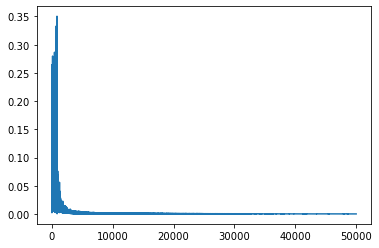

In [194]:
plt.plot(costs)